# Credit Risk Assessment

# Backgorund

A lending company has a problem where it requires efficiency and speed in receiving loans from each customer.<br>
As a Data Science intern, we try to process data and create models that are able to predict and assess optimal credit applications and predict existing risks.<br> 
To facilitate the assessment, we will create a credit score based on the logistic regression model.<br>
Finally, we will provide solutions for lending companies, how the insights we get.

# Objective

## 1. Create a credit score based on the weighting of the logistic regression
## 2. Interpretation of important features

# Data Understanding and Data Preparation

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

df = pd.read_csv('loan_data_2007_2014.csv')

In [3]:
df.sample(3)

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
240684      240684  36119392   38830996      10000        10000   
347603      347603  21050124   23332880      15000        15000   
271305      271305  31998746   34611965      20000        20000   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
240684          10000.0   36 months      6.49       306.45     A        A2   
347603          15000.0   36 months      9.17       478.19     B        B1   
271305          20000.0   36 months      7.69       623.88     A        A4   

                 emp_title emp_length home_ownership  annual_inc  \
240684               Owner  10+ years           RENT    105000.0   
347603       Store manager    5 years           RENT     37500.0   
271305  Right of Way Agent    4 years           RENT    178000.0   

       verification_status issue_d loan_status pymnt_plan  \
240684     Source Verified  Dec-14     Current          n   
347603        Not Verified  Jul-14     Current          n   
271305        Not Verified  Oct-14     Current          n   

                                                      url desc  \
240684  https://www.lendingclub.com/browse/loanDetail....  NaN   
347603  https://www.lendingclub.com/browse/loanDetail....  NaN   
271305  https://www.lendingclub.com/browse/loanDetail....  NaN   

                   purpose                    title zip_code addr_state  \
240684         credit_card  Credit card refinancing    941xx         CA   
347603  debt_consolidation       Debt consolidation    531xx         WI   
271305         credit_card  Credit card refinancing    594xx         MT   

          dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
240684  11.23          0.0           Dec-84             1.0   
347603  22.85          0.0           Jun-00             0.0   
271305  13.87          0.0           Aug-87             0.0   

        mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
240684                     NaN                     NaN       5.0      0.0   
347603                     NaN                     NaN      10.0      0.0   
271305                    29.0                     NaN       9.0      0.0   

        revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
240684       7354        66.9        9.0                   w    6610.63   
347603      13913        53.1       17.0                   w    8012.93   
271305      20373        68.6       28.0                   w   12763.39   

        out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
240684        6610.63      3980.24          3980.24          3389.37   
347603        8012.93      8607.42          8607.42          6987.07   
271305       12763.39      8725.78          8725.78          7236.61   

        total_rec_int  total_rec_late_fee  recoveries  \
240684         590.87                 0.0         0.0   
347603        1620.35                 0.0         0.0   
271305        1489.17                 0.0         0.0   

        collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d  \
240684                      0.0       Jan-16           306.45       Feb-16   
347603                      0.0       Jan-16           478.19       Feb-16   
271305                      0.0       Jan-16           623.88       Jan-16   

       last_credit_pull_d  collections_12_mths_ex_med  \
240684             Jan-16                         0.0   
347603             Jan-16                         0.0   
271305             Jan-16                         0.0   

        mths_since_last_major_derog  policy_code application_type  \
240684                          NaN            1       INDIVIDUAL   
347603                          NaN            1       INDIVIDUAL   
271305                         29.0            1       INDIVIDUAL   

        annual_inc_joint  dti_joint  verification_status_joint  \
240684               NaN        NaN                        NaN   
347603    

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [5]:
df.isnull().sum()

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340302
purpose                             0
title                              20
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs 

- We can see that some columns in the data have null values, so we will handle it.
- Drop column Unnamed: 0 because it's just someting like an index

In [6]:
df_cleaned = df.copy()
df_cleaned.sample(3)

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
271823      271823  32159005   34772219      28000        28000   
278790      278790  31277069   33850282      25000        25000   
6441          6441    969040    1190235      20000        20000   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
271823          28000.0   60 months     10.99       608.65     B        B3   
278790          25000.0   36 months     15.61       874.12     D        D1   
6441            19750.0   60 months     10.65       431.37     B        B2   

                        emp_title emp_length home_ownership  annual_inc  \
271823        Contract Specialist  10+ years       MORTGAGE    120000.0   
278790                 OTR Driver     1 year       MORTGAGE     75000.0   
6441    Oregon Air National Guard  10+ years       MORTGAGE     68000.0   

       verification_status issue_d         loan_status pymnt_plan  \
271823     Source Verified  Oct-14  Late (31-120 days)          n   
278790            Verified  Oct-14             Current          n   
6441              Verified  Oct-11          Fully Paid          n   

                                                      url desc  \
271823  https://www.lendingclub.com/browse/loanDetail....  NaN   
278790  https://www.lendingclub.com/browse/loanDetail....  NaN   
6441    https://www.lendingclub.com/browse/loanDetail....  NaN   

                   purpose               title zip_code addr_state    dti  \
271823  debt_consolidation  Debt consolidation    840xx         UT  20.25   
278790  debt_consolidation  Debt consolidation    800xx         CO  23.74   
6441    debt_consolidation                Mine    976xx         OR  18.44   

        delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
271823          0.0           Jun-97             0.0                     NaN   
278790          0.0           Dec-93             0.0                    52.0   
6441            0.0           May-91             0.0                     NaN   

        mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
271823                     NaN      11.0      0.0      22710        68.8   
278790                     NaN      19.0      0.0      24976        83.5   
6441                       NaN      11.0      0.0      15505        29.6   

        total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
271823       27.0                   w   23376.65       23376.65   7878.26000   
278790       33.0                   f   16628.59       16628.59  12194.32000   
6441         29.0                   f       0.00           0.00  25179.61787   

        total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
271823          7878.26          4623.35        3254.91                 0.0   
278790         12194.32          8371.41        3822.91                 0.0   
6441           24864.76         20000.00        5179.62                 0.0   

        recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
271823         0.0                      0.0       Jan-16           608.65   
278790         0.0                      0.0       Dec-15           874.12   
6441           0.0                      0.0       Feb-15          8388.95   

       next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  \
271823       Feb-16             Jan-16                         0.0   
278790       Jan-16             Jan-16                         0.0   
6441            NaN             Mar-15                         0.0   

        mths_since_last_major_derog  policy_code application_type  \
271823                          NaN            1       INDIVIDUAL   
278790                         55.0            1       INDIVIDUAL   
6441                            NaN            1       INDIVIDUAL   

        annual_inc_joint  dti_joint  verification_status_joint  \
271823               NaN        NaN                        NaN   
278790     

Drop column __Unnamed: 0__

In [7]:
df_cleaned.drop(columns=['Unnamed: 0'], inplace = True)

Define numeric and categorical columns

In [8]:
categorical_columns = df_cleaned.select_dtypes(include = 'object')
numerical_columns = df_cleaned.select_dtypes(exclude = 'object')
categorical_columns = categorical_columns.columns.to_list()
numerical_columns = numerical_columns.columns.to_list()

In [9]:
print("Categorical column is : \n", categorical_columns, "\n")
print("Numerical column is : \n", numerical_columns)

Categorical column is : 
 ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type'] 

Numerical column is : 
 ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',

In [10]:
df_cleaned[numerical_columns].describe()

id     member_id      loan_amnt    funded_amnt  \
count  4.662850e+05  4.662850e+05  466285.000000  466285.000000   
mean   1.307973e+07  1.459766e+07   14317.277577   14291.801044   
std    1.089371e+07  1.168237e+07    8286.509164    8274.371300   
min    5.473400e+04  7.047300e+04     500.000000     500.000000   
25%    3.639987e+06  4.379705e+06    8000.000000    8000.000000   
50%    1.010790e+07  1.194108e+07   12000.000000   12000.000000   
75%    2.073121e+07  2.300154e+07   20000.000000   20000.000000   
max    3.809811e+07  4.086083e+07   35000.000000   35000.000000   

       funded_amnt_inv       int_rate    installment    annual_inc  \
count    466285.000000  466285.000000  466285.000000  4.662810e+05   
mean      14222.329888      13.829236     432.061201  7.327738e+04   
std        8297.637788       4.357587     243.485550  5.496357e+04   
min           0.000000       5.420000      15.670000  1.896000e+03   
25%        8000.000000      10.990000     256.690000  4.500000e+04   
50%       12000.000000      13.660000     379.890000  6.300000e+04   
75%       19950.000000      16.490000     566.580000  8.896000e+04   
max       35000.000000      26.060000    1409.990000  7.500000e+06   

                 dti    delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  466285.000000  466256.000000   466256.000000           215934.000000   
mean       17.218758       0.284678        0.804745               34.104430   
std         7.851121       0.797365        1.091598               21.778487   
min         0.000000       0.000000        0.000000                0.000000   
25%        11.360000       0.000000        0.000000               16.000000   
50%        16.870000       0.000000        0.000000               31.000000   
75%        22.780000       0.000000        1.000000               49.000000   
max        39.990000      29.000000       33.000000              188.000000   

       mths_since_last_record       open_acc        pub_rec     revol_bal  \
count            62638.000000  466256.000000  466256.000000  4.662850e+05   
mean                74.306012      11.187069       0.160564  1.623020e+04   
std                 30.357653       4.987526       0.510863  2.067625e+04   
min                  0.000000       0.000000       0.000000  0.000000e+00   
25%                 53.000000       8.000000       0.000000  6.413000e+03   
50%                 76.000000      10.000000       0.000000  1.176400e+04   
75%                102.000000      14.000000       0.000000  2.033300e+04   
max                129.000000      84.000000      63.000000  2.568995e+06   

          revol_util      total_acc      out_prncp  out_prncp_inv  \
count  465945.000000  466256.000000  466285.000000  466285.000000   
mean       56.176947      25.064430    4410.062342    4408.452258   
std        23.732628      11.600141    6355.078769    6353.198001   
min         0.000000       1.000000       0.000000       0.000000   
25%        39.200000      17.000000       0.000000       0.000000   
50%        57.600000      23.000000     441.470000     441.380000   
75%        74.700000      32.000000    7341.650000    7338.390000   
max       892.300000     156.000000   32160.380000   32160.380000   

         total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
count  466285.000000    466285.000000    466285.000000  466285.000000   
mean    11540.686220     11469.892747      8866.014657    2588.677225   
std      8265.627112      8254.157579      7031.687997    2483.809661   
min         0.000000         0.000000         0.000000       0.000000   
25%      5552.125349      5499.250000      3708.560000     957.280000   
50%      9419.250943      9355.430000      6817.760000    1818.880000   
75%     15308.158460     15231.310000     12000.000000    3304.530000   
max     57777.579870     57777.580000     35000.030000   24205.620000   

       total_rec_late_fee     recoveries  collection_recovery_fee  \
count       466285.000000  

In the __numerical columns__, some columns __have many missing values__, so we need to handle it

In [11]:
df_cleaned[categorical_columns].describe().T

count  unique  \
term                 466285       2   
grade                466285       7   
sub_grade            466285      35   
emp_title            438697  205475   
emp_length           445277      11   
home_ownership       466285       6   
verification_status  466285       3   
issue_d              466285      91   
loan_status          466285       9   
pymnt_plan           466285       2   
url                  466285  466285   
desc                 125983  124436   
purpose              466285      14   
title                466265   63099   
zip_code             466285     888   
addr_state           466285      50   
earliest_cr_line     466256     664   
initial_list_status  466285       2   
last_pymnt_d         465909      98   
next_pymnt_d         239071     100   
last_credit_pull_d   466243     103   
application_type     466285       1   

                                                                   top    freq  
term                                                         36 months  337953  
grade                                                                B  136929  
sub_grade                                                           B3   31686  
emp_title                                                      Teacher    5399  
emp_length                                                   10+ years  150049  
home_ownership                                                MORTGAGE  235875  
verification_status                                           Verified  168055  
issue_d                                                         Oct-14   38782  
loan_status                                                    Current  224226  
pymnt_plan                                                           n  466276  
url                  https://www.lendingclub.com/browse/loanDetail....       1  
desc                                                                       234  
purpose                                             debt_consolidation  274195  
title                                               Debt consolidation  164075  
zip_code                                                         945xx    5304  
addr_state                                                          CA   71450  
earliest_cr_line                                                Oct-00    3674  
initial_list_status                                                  f  303005  
last_pymnt_d                                                    Jan-16  179620  
next_pymnt_d                                                    Feb-16  208393  
last_credit_pull_d                                              Jan-16  327699  
application_type                                            INDIVIDUAL  466285

In [12]:
df_cleaned[categorical_columns].isnull().sum()

term                        0
grade                       0
sub_grade                   0
emp_title               27588
emp_length              21008
home_ownership              0
verification_status         0
issue_d                     0
loan_status                 0
pymnt_plan                  0
url                         0
desc                   340302
purpose                     0
title                      20
zip_code                    0
addr_state                  0
earliest_cr_line           29
initial_list_status         0
last_pymnt_d              376
next_pymnt_d           227214
last_credit_pull_d         42
application_type            0
dtype: int64

* Some categorical columns have data form that should be of type datetime but are still of type object. So, we want to change it
* Some categorical columns have too many unique values and only have one unique value so it will be drop
* Some categorical columns have missing values, we will check it again to see the percentage of missing values

## Duplicated Values

__Check Duplicated Values for ID column__

In [13]:
df_cleaned['id'].duplicated().sum()

0

We can see that ID column is not have duplicated values. It's means that for each rows is represented one ID or person.

## Null Value (Missing Value)

In [14]:
#Percentage of missing values
missing_value_percentage = df_cleaned.isnull().sum() * 100/ len(df)

data_types = [df_cleaned[col].dtype for col in df_cleaned.columns]

#Create dataframe for missing values summary
missing_value_df = pd.DataFrame({'missing_value': df_cleaned.isnull().sum(),
                                'data_type': data_types,
                                'percentage_missing_value': missing_value_percentage})

#sort
missing_value_df = missing_value_df.sort_values('percentage_missing_value', ascending = False)

missing_value_df = missing_value_df[missing_value_df['percentage_missing_value']>0].reset_index()
missing_value_df = missing_value_df.rename(columns={'index':'columns'})

In [15]:
#Top 5 higher missing values
print("Top 5 higher missing values")
missing_value_df.head()

Top 5 higher missing values


columns  missing_value data_type  \
0               inq_last_12m         466285   float64   
1  verification_status_joint         466285   float64   
2                open_acc_6m         466285   float64   
3                 open_il_6m         466285   float64   
4                open_il_12m         466285   float64   

   percentage_missing_value  
0                     100.0  
1                     100.0  
2                     100.0  
3                     100.0  
4                     100.0

In [16]:
print("Top 5 lower missing values")
missing_value_df.tail()

Top 5 lower missing values


columns  missing_value data_type  percentage_missing_value
35  earliest_cr_line             29    object                  0.006219
36       delinq_2yrs             29   float64                  0.006219
37    acc_now_delinq             29   float64                  0.006219
38             title             20    object                  0.004289
39        annual_inc              4   float64                  0.000858

__Plot percentage of total column with more than 50% missing values__

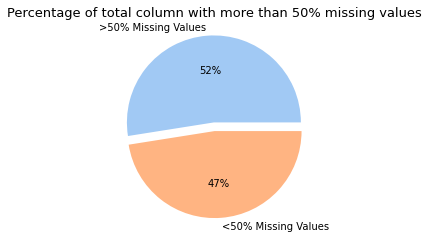

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = sns.color_palette("pastel")

plt.pie([len(missing_value_df[missing_value_df['percentage_missing_value'] > 50]), 
         len(missing_value_df[missing_value_df['percentage_missing_value'] < 50])], 
        labels = ['>50% Missing Values', '<50% Missing Values'], 
        colors= colors, autopct='%.0f%%', explode=[0.1, 0])
plt.title('Percentage of total column with more than 50% missing values', size=13)
plt.show()

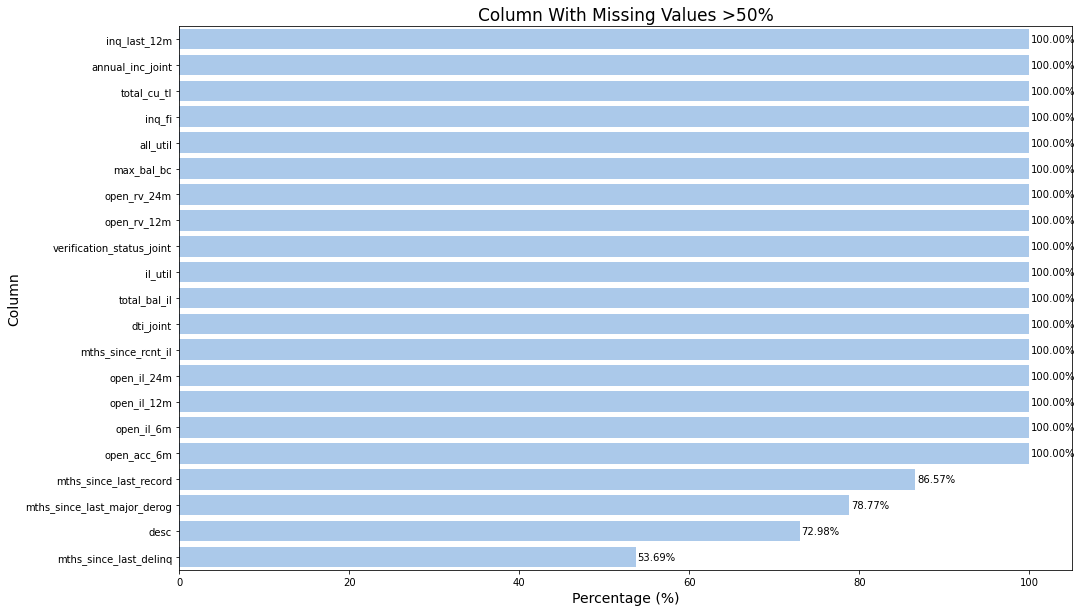

In [18]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.title("Column With Missing Values >50%", size = 17)
sns.barplot(x='percentage_missing_value', y='columns', 
            data=missing_value_df[missing_value_df['percentage_missing_value']>50].sort_values(by='percentage_missing_value', 
                                                                                             ascending=False), color='#a1c9f4')
plt.bar_label(ax.containers[0], padding=2,fmt='%.2f%%')
plt.xlabel('Percentage (%)', size=14)
plt.ylabel('Column', size=14)
plt.show()    

## Handling Missing Value

In [19]:
# Drop feature that have more than 50% missing value
col_null = missing_value_df['columns'][missing_value_df['percentage_missing_value']> 50].tolist()
df_cleaned.drop(columns=col_null, inplace = True)

# Feature `tot_coll_amt`,`tot_cur_bal`,`total_rev_hi_lim` replace missing value with "0" because asumption that customer didn't borrowed again
for col in ['tot_coll_amt','tot_cur_bal','total_rev_hi_lim']:
    df_cleaned[col] = df_cleaned[col].fillna(0)
    
# Numerical columns replace missing value with "Median"
for col in df_cleaned.select_dtypes(exclude = 'object'):
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())
df_cleaned.isnull().sum()

# Categorical columns replace missing value with "Mode"
for col in df_cleaned.select_dtypes(include = 'object'):
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode().iloc[0])

Check missing values again

In [20]:
df_cleaned.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_ac

## Target (Label)

In this case, the label is __loan_status__

In [21]:
df_cleaned['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

<AxesSubplot:>

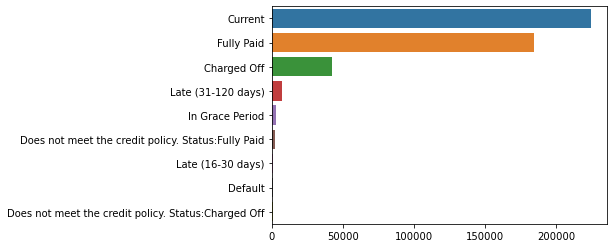

In [22]:
sns.barplot(y=df_cleaned['loan_status'].value_counts().index, x=df_cleaned['loan_status'].value_counts().values)

1. There are 9 unique values in the loan_status column that will be the target model.
2. The labels will be divided into two class (binary classification), namely __"Good Loans"__ with the __number 1__ and __"bad_loan"__ with the __number 0__
3. __Good loan__ is defined as having a loan status of __Current__, __Fully Paid__ , and __In Grace Period__, __Does not meet the credit policy. Status:Fully Paid__, and __Late (16-30 days)__. 
4. __Bad loan__ is defined as having a __loan status other than Good loan__

Note : Sometimes, bad loans definition can be different, depending on business needs. But in this case, I will use the definition above.

In [23]:
import numpy as np

good_loan = ['Current','Fully Paid','In Grace Period', 'Does not meet the credit policy. Status:Fully Paid', 
             'Late (16-30 days)']
df_cleaned['loan_status'] = np.where(df_cleaned['loan_status'].isin(good_loan),1,0)
df_cleaned['loan_status'].value_counts()

1    415317
0     50968
Name: loan_status, dtype: int64

<AxesSubplot:>

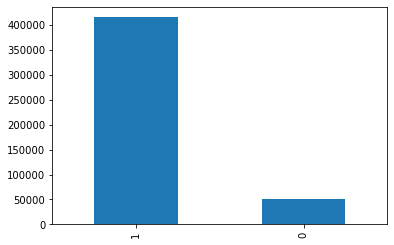

In [24]:
df_cleaned['loan_status'].value_counts().plot(kind='bar')

Based on the label, we can say that the data has __imbalanced data__. So, we will handle it later

## Unnecesary Column

Remove any column with "identity" value or something like that.


In this case we will drop __'member_id','url','title','addr_state','zip_code','policy_code','application_type','emp_title'__ columns

In [25]:
df_cleaned = df_cleaned.drop(['member_id','url','title','addr_state','zip_code','policy_code','application_type','emp_title'], axis=1)

## Date Time Feature

Date Time Feature Is 'earliest_cr_line','last_credit_pull_d','last_pymnt_d','issue_d','next_pymnt_d'

In [26]:
df_cleaned[['earliest_cr_line','last_credit_pull_d','last_pymnt_d','issue_d','next_pymnt_d']].head()

earliest_cr_line last_credit_pull_d last_pymnt_d issue_d next_pymnt_d
0           Jan-85             Jan-16       Jan-15  Dec-11       Feb-16
1           Apr-99             Sep-13       Apr-13  Dec-11       Feb-16
2           Nov-01             Jan-16       Jun-14  Dec-11       Feb-16
3           Feb-96             Jan-15       Jan-15  Dec-11       Feb-16
4           Jan-96             Jan-16       Jan-16  Dec-11       Feb-16

In [27]:
df_cleaned[['earliest_cr_line','last_credit_pull_d','last_pymnt_d','issue_d','next_pymnt_d']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   earliest_cr_line    466285 non-null  object
 1   last_credit_pull_d  466285 non-null  object
 2   last_pymnt_d        466285 non-null  object
 3   issue_d             466285 non-null  object
 4   next_pymnt_d        466285 non-null  object
dtypes: object(5)
memory usage: 17.8+ MB


We can see that columns are have "object" data type. So, we will convert it into "datetime" data type 

In [28]:
df_cleaned['earliest_cr_line'] = pd.to_datetime(df_cleaned['earliest_cr_line'], format = '%b-%y')
df_cleaned['last_credit_pull_d'] = pd.to_datetime(df_cleaned['last_credit_pull_d'], format = '%b-%y')
df_cleaned['last_pymnt_d'] = pd.to_datetime(df_cleaned['last_pymnt_d'], format = '%b-%y')
df_cleaned['issue_d'] = pd.to_datetime(df_cleaned['issue_d'], format = '%b-%y')
df_cleaned['next_pymnt_d'] = pd.to_datetime(df_cleaned['next_pymnt_d'], format = '%b-%y')

In [29]:
df_cleaned[['earliest_cr_line','last_credit_pull_d','last_pymnt_d','issue_d','next_pymnt_d']].head()

earliest_cr_line last_credit_pull_d last_pymnt_d    issue_d next_pymnt_d
0       1985-01-01         2016-01-01   2015-01-01 2011-12-01   2016-02-01
1       1999-04-01         2013-09-01   2013-04-01 2011-12-01   2016-02-01
2       2001-11-01         2016-01-01   2014-06-01 2011-12-01   2016-02-01
3       1996-02-01         2015-01-01   2015-01-01 2011-12-01   2016-02-01
4       1996-01-01         2016-01-01   2016-01-01 2011-12-01   2016-02-01

In [30]:
df_cleaned[['earliest_cr_line','last_credit_pull_d','last_pymnt_d','issue_d','next_pymnt_d']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   earliest_cr_line    466285 non-null  datetime64[ns]
 1   last_credit_pull_d  466285 non-null  datetime64[ns]
 2   last_pymnt_d        466285 non-null  datetime64[ns]
 3   issue_d             466285 non-null  datetime64[ns]
 4   next_pymnt_d        466285 non-null  datetime64[ns]
dtypes: datetime64[ns](5)
memory usage: 17.8 MB


## Adding New Feature

* __pymnt_time__ = the number of month between __next_pymnt_d__ and __last_pymnt_d__
* __credit_pull_year__ = the number of year between __earliest_cr_line__ and __last_credit_pull_d__

In [31]:
# Create function

def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month
def diff_year(d1, d2):
    return (d1.year - d2.year)

In [32]:
df_cleaned['pymnt_time'] = df_cleaned.apply(lambda x: diff_month(x.next_pymnt_d, x.last_pymnt_d), axis=1)
df_cleaned['credit_pull_year'] = df_cleaned.apply(lambda x: diff_year(x.last_credit_pull_d, x.earliest_cr_line), axis=1)

In [33]:
df_cleaned[df_cleaned['pymnt_time']<0][['next_pymnt_d','last_pymnt_d','pymnt_time']]

next_pymnt_d last_pymnt_d  pymnt_time
40122   2011-02-01   2016-01-01         -59
40481   2010-10-01   2016-01-01         -63
40498   2010-10-01   2016-01-01         -63
40753   2010-06-01   2016-01-01         -67
40769   2010-06-01   2016-01-01         -67
40785   2010-06-01   2016-01-01         -67
40848   2010-05-01   2016-01-01         -68
40914   2010-04-01   2016-01-01         -69
40927   2010-04-01   2016-01-01         -69
41145   2009-11-01   2016-01-01         -74
41887   2008-12-01   2016-01-01         -85
41931   2009-01-01   2016-01-01         -84

In [34]:
df_cleaned[df_cleaned['credit_pull_year']<0][['earliest_cr_line','last_credit_pull_d','credit_pull_year']]

earliest_cr_line last_credit_pull_d  credit_pull_year
1580         2062-09-01         2013-09-01               -49
1770         2068-09-01         2015-09-01               -53
2799         2064-09-01         2016-01-01               -48
3282         2067-09-01         2015-05-01               -52
3359         2065-02-01         2014-11-01               -51
...                 ...                ...               ...
464003       2068-01-01         2016-01-01               -52
464260       2066-07-01         2015-12-01               -51
465100       2067-10-01         2016-01-01               -51
465500       2067-09-01         2015-09-01               -52
465655       2056-01-01         2014-03-01               -42

[1169 rows x 3 columns]

* Negative value in the __pymnt_time__ feature will be replaced with 0 because it assumes that the customer does not have a bill to make a payment

* There is an false input in the __earliest_cr_line__ feature, resulting in a negative __credit_pull_year__ value so that the line with that value will be replaced with the maximum value of the __credit_pull_year__ feature

In [35]:
df_cleaned.loc[df_cleaned['pymnt_time'] < 0,'pymnt_time'] = 0
df_cleaned.loc[df_cleaned['credit_pull_year'] < 0,'credit_pull_year'] = df_cleaned['credit_pull_year'].max()

In [36]:
df_cleaned.drop(columns=['issue_d','earliest_cr_line','next_pymnt_d','last_pymnt_d','last_credit_pull_d'], inplace = True)

## Convert __term__ column  to integer data type

Example : 36 months -> 36

In [37]:
df_cleaned['term'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 466285 entries, 0 to 466284
Series name: term
Non-Null Count   Dtype 
--------------   ----- 
466285 non-null  object
dtypes: object(1)
memory usage: 3.6+ MB


In [38]:
df_cleaned['term'].value_counts()

 36 months    337953
 60 months    128332
Name: term, dtype: int64

In [39]:
df_cleaned['term'] = df_cleaned['term'].apply(lambda term: int(term[:3]))

In [40]:
df_cleaned['term'].value_counts()

36    337953
60    128332
Name: term, dtype: int64

In [41]:
df_cleaned.shape

(466285, 42)

In [42]:
df_cleaned.head()

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501       5000         5000           4975.0    36     10.65   
1  1077430       2500         2500           2500.0    60     15.27   
2  1077175       2400         2400           2400.0    36     15.96   
3  1076863      10000        10000          10000.0    36     13.49   
4  1075358       3000         3000           3000.0    60     12.69   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT     24000.0   
1        59.83     C        C4   < 1 year           RENT     30000.0   
2        84.33     C        C5  10+ years           RENT     12252.0   
3       339.31     C        C1  10+ years           RENT     49200.0   
4        67.79     B        B5     1 year           RENT     80000.0   

  verification_status  loan_status pymnt_plan         purpose    dti  \
0            Verified            1          n     credit_card  27.65   
1     Source Verified            0          n             car   1.00   
2        Not Verified            1          n  small_business   8.72   
3     Source Verified            1          n           other  20.00   
4     Source Verified            1          n           other  17.94   

   delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0          0.0             1.0       3.0      0.0      13648        83.7   
1          0.0             5.0       3.0      0.0       1687         9.4   
2          0.0             2.0       2.0      0.0       2956        98.5   
3          0.0             1.0      10.0      0.0       5598        21.0   
4          0.0             0.0      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5831.78          5000.00         861.07                0.00   
1          1008.71           456.46         435.17                0.00   
2          3003.65          2400.00         603.65                0.00   
3         12226.30         10000.00        2209.33               16.97   
4          3242.17          2233.10        1009.07                0.00   

   recoveries  collection_recovery_fee  last_pymnt_amnt  \
0        0.00                     0.00           171.62   
1      117.08                     1.11           119.66   
2        0.00                     0.00           649.91   
3        0.00                     0.00           357.48   
4        0.00                     0.00            67.79   

   collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0                         0.0             0.0           0.0          0.0   
1                         0.0             0.0           0.0          0.0   
2                         0.0             0.0           0.0          0.0   
3                         0.0             0.0           0.0          0.0   
4                         0.0             0.0           0.0          0.0   

   total_rev_hi_lim  pymnt_time  credit_pull_year  
0               0.0          13                31  
1               0.0          34                14  
2               0.0          20                15  
3               0.0          13                19  
4               0.0           1                20

In [43]:
df_cleaned.tail()

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
466280  8598660      18400        18400          18400.0    60     14.47   
466281  9684700      22000        22000          22000.0    60     19.97   
466282  9584776      20700        20700          20700.0    60     16.99   
466283  9604874       2000         2000           2000.0    36      7.90   
466284  9199665      10000        10000           9975.0    36     19.20   

        installment grade sub_grade emp_length home_ownership  annual_inc  \
466280       432.64     C        C2    4 years       MORTGAGE    110000.0   
466281       582.50     D        D5  10+ years       MORTGAGE     78000.0   
466282       514.34     D        D1    7 years       MORTGAGE     46000.0   
466283        62.59     A        A4    3 years            OWN     83000.0   
466284       367.58     D        D3  10+ years       MORTGAGE     46000.0   

       verification_status  loan_status pymnt_plan             purpose    dti  \
466280     Source Verified            1          n  debt_consolidation  19.85   
466281            Verified            0          n  debt_consolidation  18.45   
466282            Verified            1          n  debt_consolidation  25.65   
466283            Verified            1          n         credit_card   5.39   
466284            Verified            1          n               other  22.78   

        delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
466280          0.0             2.0      18.0      0.0      23208        77.6   
466281          0.0             5.0      18.0      1.0      18238        46.3   
466282          0.0             2.0      18.0      0.0       6688        51.1   
466283          3.0             1.0      21.0      0.0      11404        21.5   
466284          1.0             0.0       6.0      0.0      11325        70.8   

        total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
466280       36.0                   w   12574.00       12574.00  10383.360000   
466281       30.0                   f       0.00           0.00   4677.920000   
466282       43.0                   f   14428.31       14428.31  12343.980000   
466283       27.0                   w       0.00           0.00   2126.579838   
466284       22.0                   f    3984.38        3974.41   8821.620000   

        total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
466280         10383.36          5826.00        4557.36                 0.0   
466281          4677.92          1837.04        2840.88                 0.0   
466282         12343.98          6271.69        6072.29                 0.0   
466283          2126.58          2000.00         126.58                 0.0   
466284          8799.57          6015.62        2806.00                 0.0   

        recoveries  collection_recovery_fee  last_pymnt_amnt  \
466280         0.0                      0.0           432.64   
466281         0.0                      0.0            17.50   
466282         0.0                      0.0           514.34   
466283         0.0                      0.0          1500.68   
466284         0.0                      0.0           367.58   

        collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
466280                         0.0             0.0           0.0     294998.0   
466281                         0.0             0.0           0.0     221830.0   
466282                         0.0             0.0           0.0      73598.0   
466283                         0.0             0.0           0.0     591610.0   
466284                         0.0             0.0           0.0      57477.0   

        total_rev_hi_lim  pymnt_time  credit_pull_year  
466280           29900.0           1                13  
466281           39400.0          14                19  
466282           13100.0           1                14  
466283           53100.0          14                12  


# Exploratory Data Analysis (EDA)

In [44]:
eda_df = df_cleaned.copy()

Drop column id

In [45]:
eda_df = eda_df.drop(['id'], axis=1)

Define numerical and categorical column again

In [46]:
num = eda_df.select_dtypes(include='number').columns
cat = eda_df.select_dtypes(include='object').columns

Visualize correlation matrix

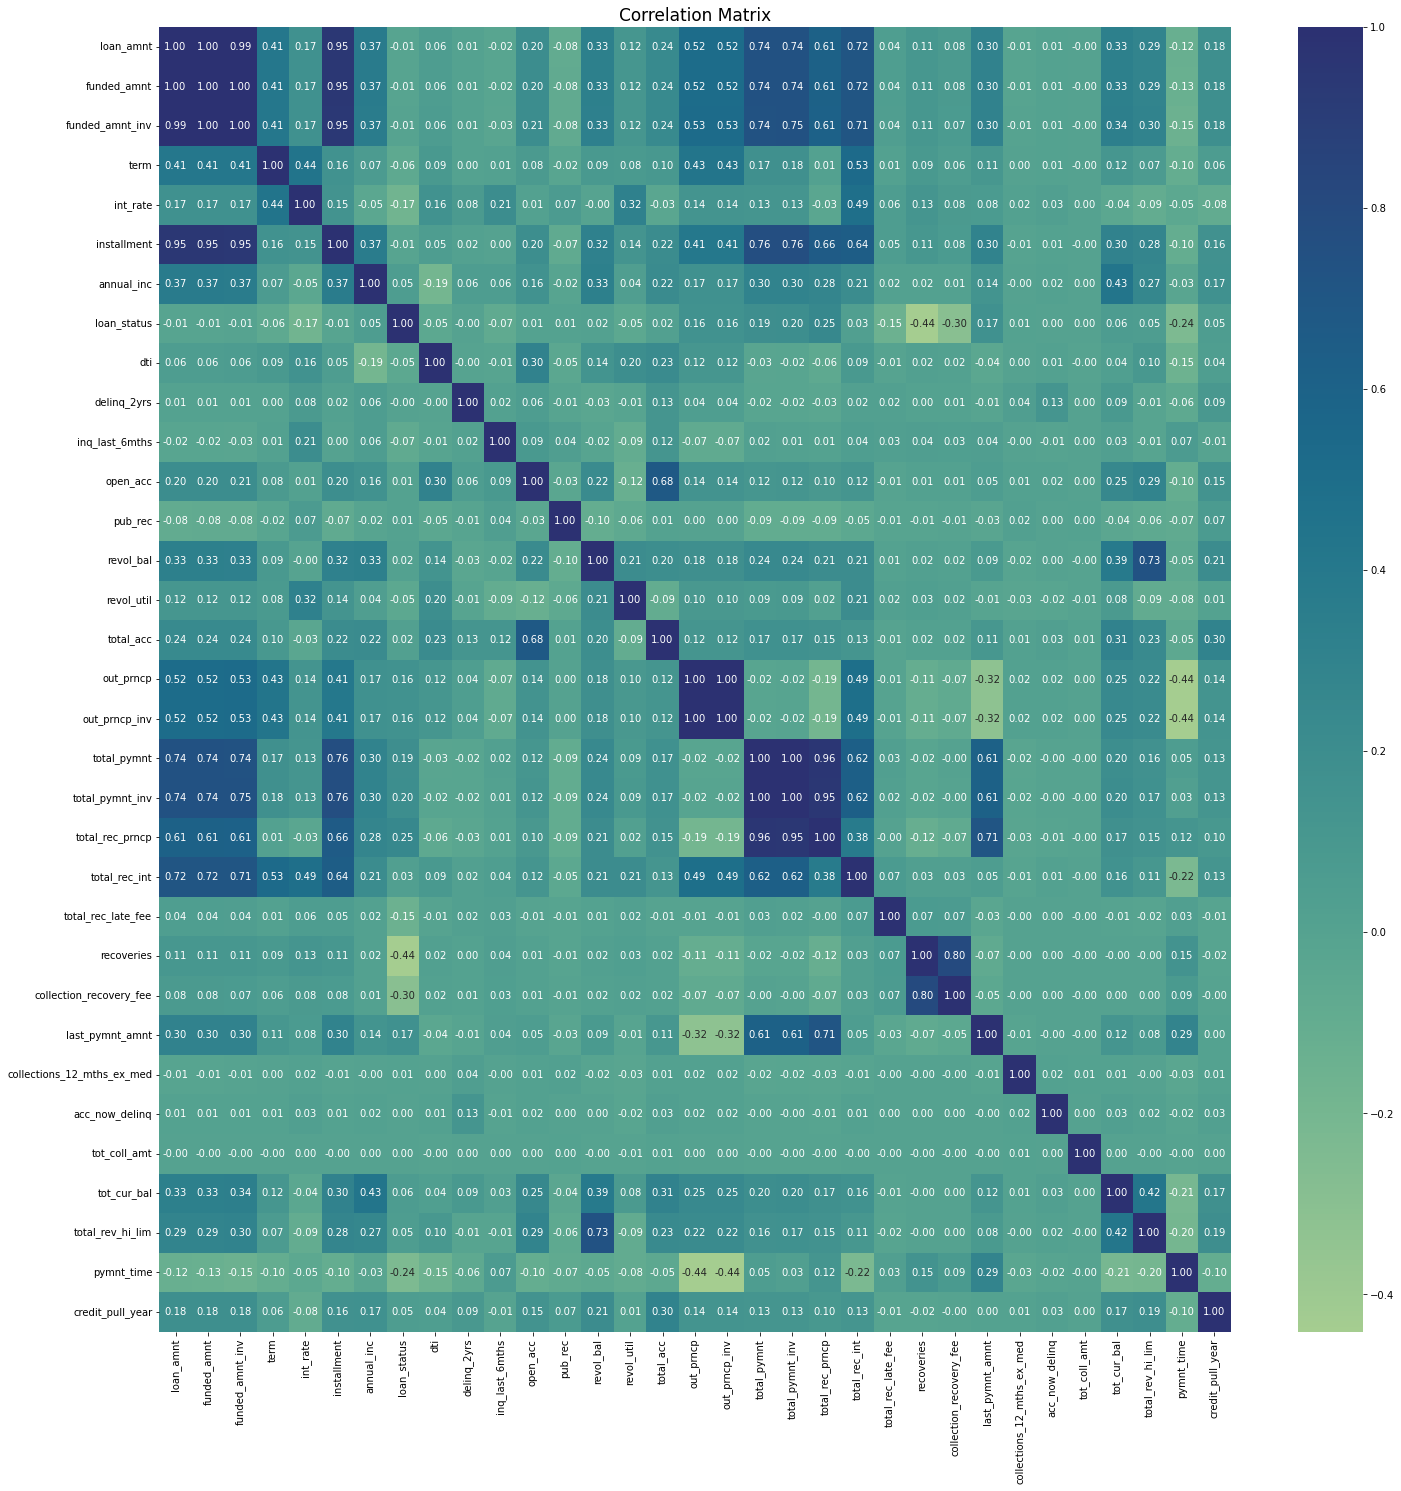

In [47]:
plt.figure(figsize=(24,24))
plt.title('Correlation Matrix', size=17)
sns.heatmap(eda_df.corr(),annot=True,fmt='.2f', cmap="crest")
plt.show()

* There are several independent features that are highly correlated with each other so that it can lead to biased results if left unchecked.
* Remove features that have a correlation of more than 0.7

In [48]:
corr_matrix = eda_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
high_multicol = [column for column in upper.columns if any(upper[column] > 0.7)]

Columns that will be deleted

In [49]:
high_multicol

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'total_rev_hi_lim']

In [50]:
print("We will drop {} columns".format(len(high_multicol)))

We will drop 11 columns


In [51]:
eda_df = eda_df.drop(high_multicol, axis=1)

In [52]:
eda_df.sample(3)

loan_amnt  term  int_rate grade sub_grade emp_length home_ownership  \
256672      10000    36     10.49     B        B3  10+ years       MORTGAGE   
330263      27000    36      8.39     A        A5  10+ years       MORTGAGE   
288182      13025    36     12.99     C        C1  10+ years       MORTGAGE   

        annual_inc verification_status  loan_status pymnt_plan  \
256672     51000.0        Not Verified            1          n   
330263     85000.0     Source Verified            1          n   
288182     60000.0     Source Verified            0          n   

                   purpose    dti  delinq_2yrs  inq_last_6mths  open_acc  \
256672         credit_card  31.55          3.0             0.0      22.0   
330263         credit_card  15.82          0.0             2.0       8.0   
288182  debt_consolidation  27.48          1.0             1.0      12.0   

        pub_rec  revol_bal  revol_util  total_acc initial_list_status  \
256672      0.0      20783        70.2       59.0                   w   
330263      0.0      19999        70.9       40.0                   f   
288182      0.0      16688        45.8       23.0                   w   

        out_prncp  total_rec_late_fee  recoveries  collections_12_mths_ex_med  \
256672    6478.36                 0.0         0.0                         0.0   
330263   15090.83                 0.0         0.0                         0.0   
288182    8645.39                 0.0         0.0                         0.0   

        acc_now_delinq  tot_coll_amt  tot_cur_bal  pymnt_time  \
256672             0.0           0.0     179156.0           1   
330263             0.0         982.0     196873.0           1   
288182             0.0           0.0     340427.0           1   

        credit_pull_year  
256672                19  
330263                30  
288182                29

In [53]:
eda_df[cat].nunique()

grade                   7
sub_grade              35
emp_length             11
home_ownership          6
verification_status     3
pymnt_plan              2
purpose                14
initial_list_status     2
dtype: int64

__grade__ and __sub_grade__ have similar interpretations, so decided to remove the __sub_grade__ feature because it's kind of derived from column __grade__

In [54]:
eda_df = eda_df.drop(['sub_grade'], axis=1)

In [55]:
eda_df.sample(3)

loan_amnt  term  int_rate grade emp_length home_ownership  annual_inc  \
382925       8000    36     10.99     B  10+ years           RENT     60000.0   
212182      16000    60     10.74     B    4 years           RENT     33000.0   
168570      10750    36     18.75     D    5 years           RENT     32000.0   

       verification_status  loan_status pymnt_plan             purpose    dti  \
382925            Verified            1          n  debt_consolidation  14.56   
212182            Verified            1          n  debt_consolidation  30.18   
168570        Not Verified            1          n  debt_consolidation  20.59   

        delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
382925          0.0             1.0      10.0      0.0       8510        64.0   
212182          0.0             0.0      18.0      0.0      23747        33.7   
168570          0.0             2.0       7.0      0.0      13793        45.7   

        total_acc initial_list_status  out_prncp  total_rec_late_fee  \
382925       60.0                   f       0.00                 0.0   
212182       28.0                   f    5726.48                 0.0   
168570       10.0                   w       0.00                 0.0   

        recoveries  collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  \
382925         0.0                         0.0             0.0           0.0   
212182         0.0                         0.0             0.0           0.0   
168570         0.0                         0.0             0.0           0.0   

        tot_cur_bal  pymnt_time  credit_pull_year  
382925      34087.0          11                14  
212182          0.0           2                26  
168570      13941.0           7                29

## Numerical Data Distribustion

In [56]:
print("Data is having {} numerical columns".format(len(eda_df.select_dtypes(include='number').columns)))

Data is having 22 numerical columns


Visualize numerical data distribution

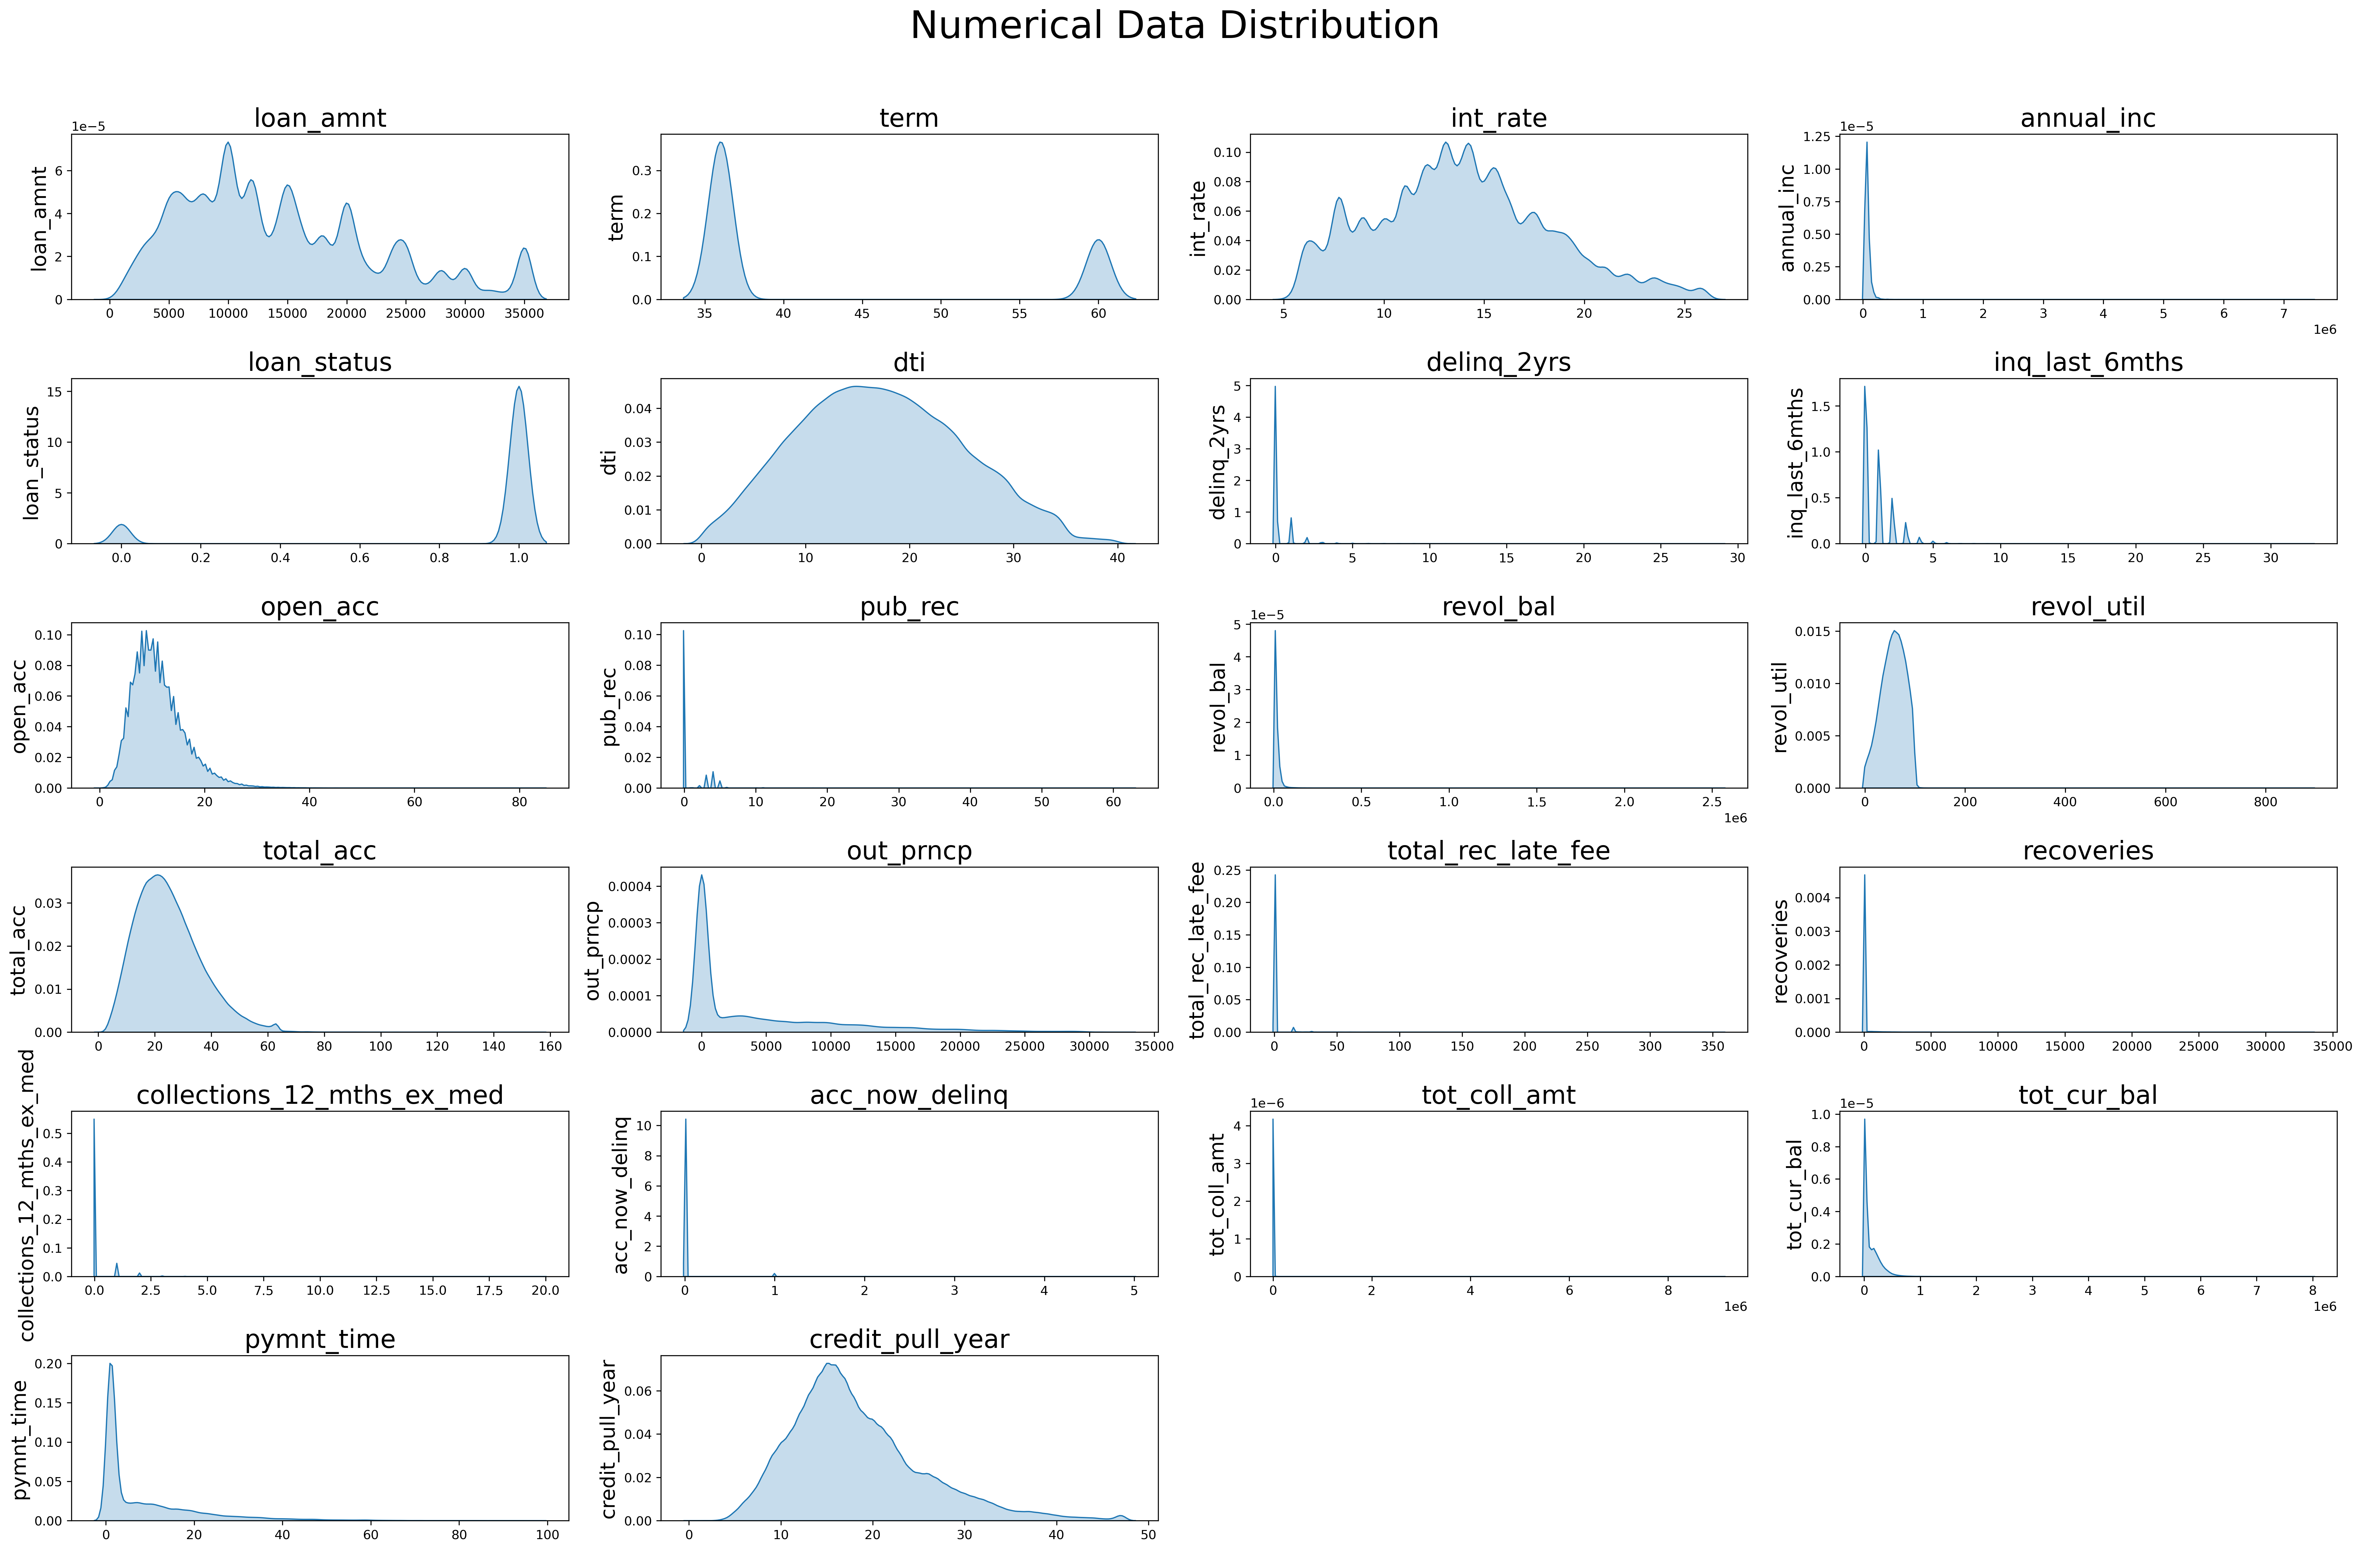

In [57]:
num = eda_df.select_dtypes(include='number').columns
plt.figure(figsize=(26,28), dpi=300)
for i in range(0,len(num)):
    plt.subplot(10,4,i+1)
    plt.suptitle("Numerical Data Distribution \n \n", size=30)
    sns.kdeplot(x=eda_df[num[i]], palette='pastel', shade=True)
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.ylabel(str(num[i]), size=16)
    plt.tight_layout()

We can see in above that the __majority numerical columns is not have normal distribution. Only 'dti' column__ is close to a normal distribution. So, we we want to using standarizations to dti column and normalizations to another numerical columns

## Categorical Data Distribustion

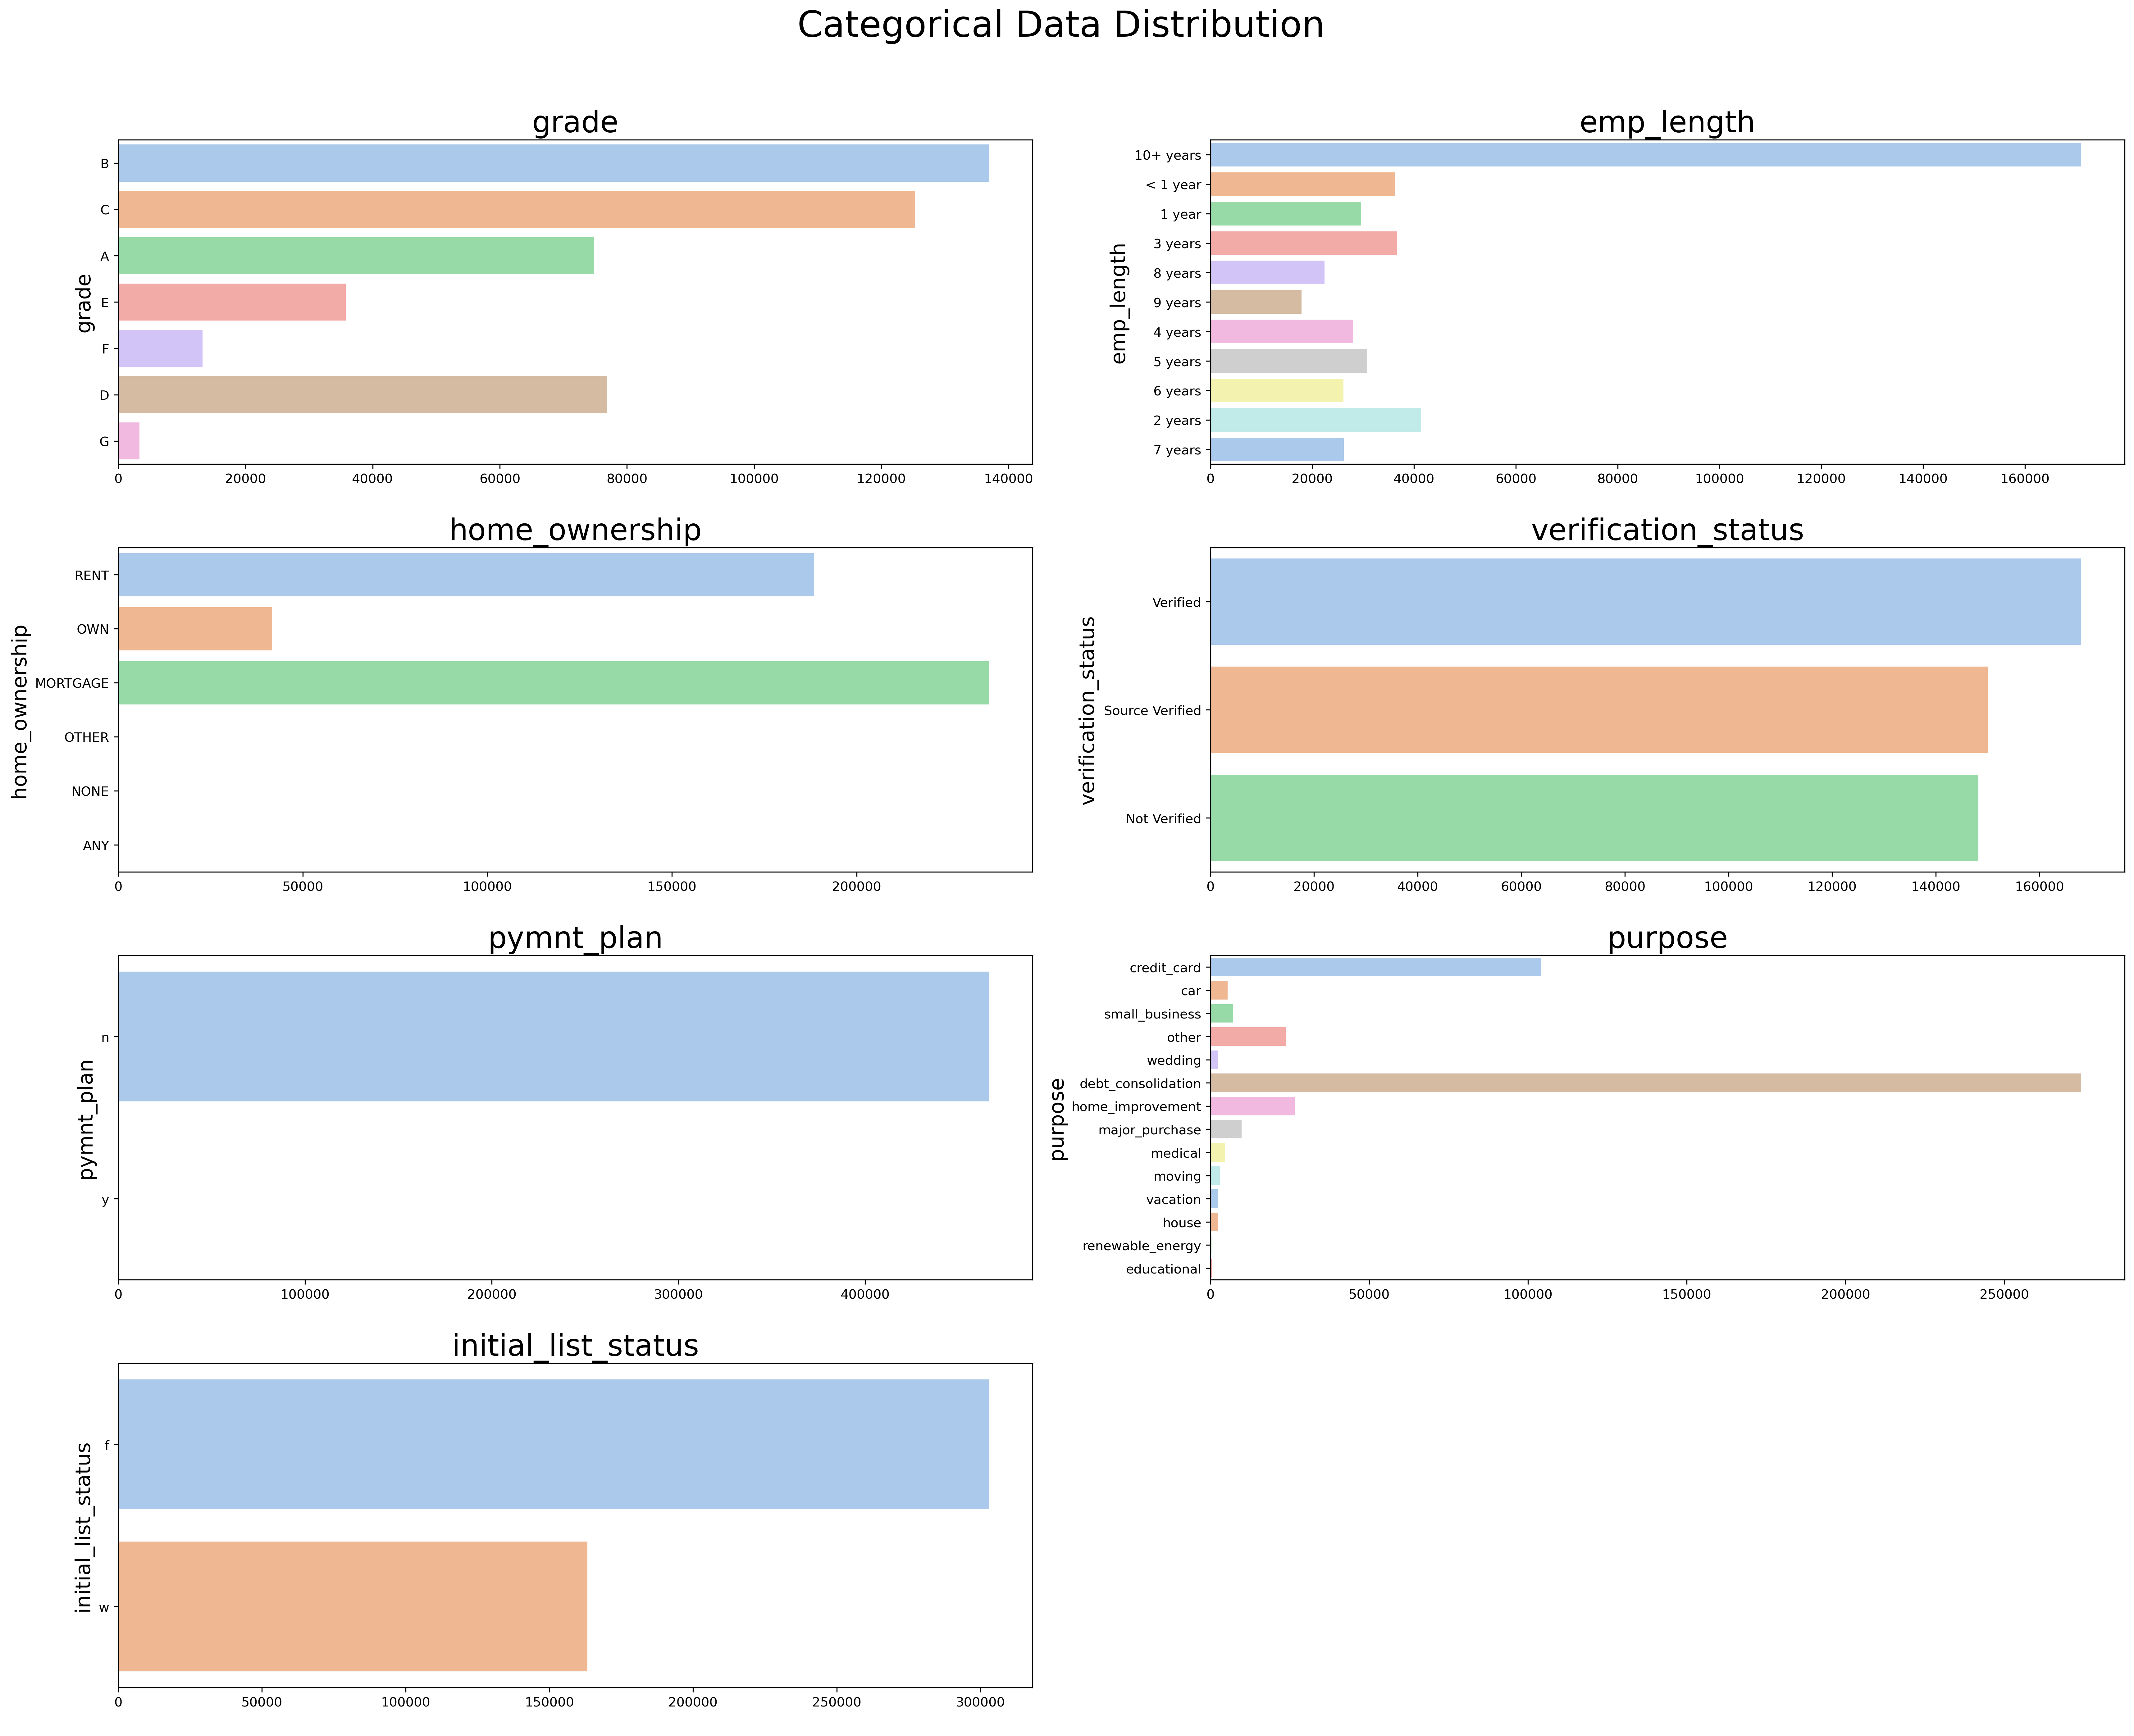

In [58]:
cat = eda_df.select_dtypes(include='object').columns
plt.figure(figsize=(23,23), dpi=300)
for i in range(0,len(cat)):
    plt.subplot(5,2,i+1)
    plt.suptitle("Categorical Data Distribution \n \n", size=28)
    sns.countplot(y=eda_df[cat[i]], orient = 'h',palette='pastel')
    plt.title(cat[i], size=23)
    plt.xlabel(' ')
    plt.ylabel(str(cat[i]), size=16)
    plt.tight_layout()

Based on graph above, we get some informations:
1. __grade__ column is __dominated by grade B__
2. __emp_length__ column is __dominated by emp_length >10 years__
3. __home_ownership__ column is __dominated by mortgage__
4. __verification_status__ feature is __dominated by verified__
5. __purpose__ feature is __dominated by debt_consolidation__
6. __initial_list_status__ feature is __dominated by f__

* __pymnt_plan__ column has a problem because data only __contains one unique value__. So, we decided to __drop this column__

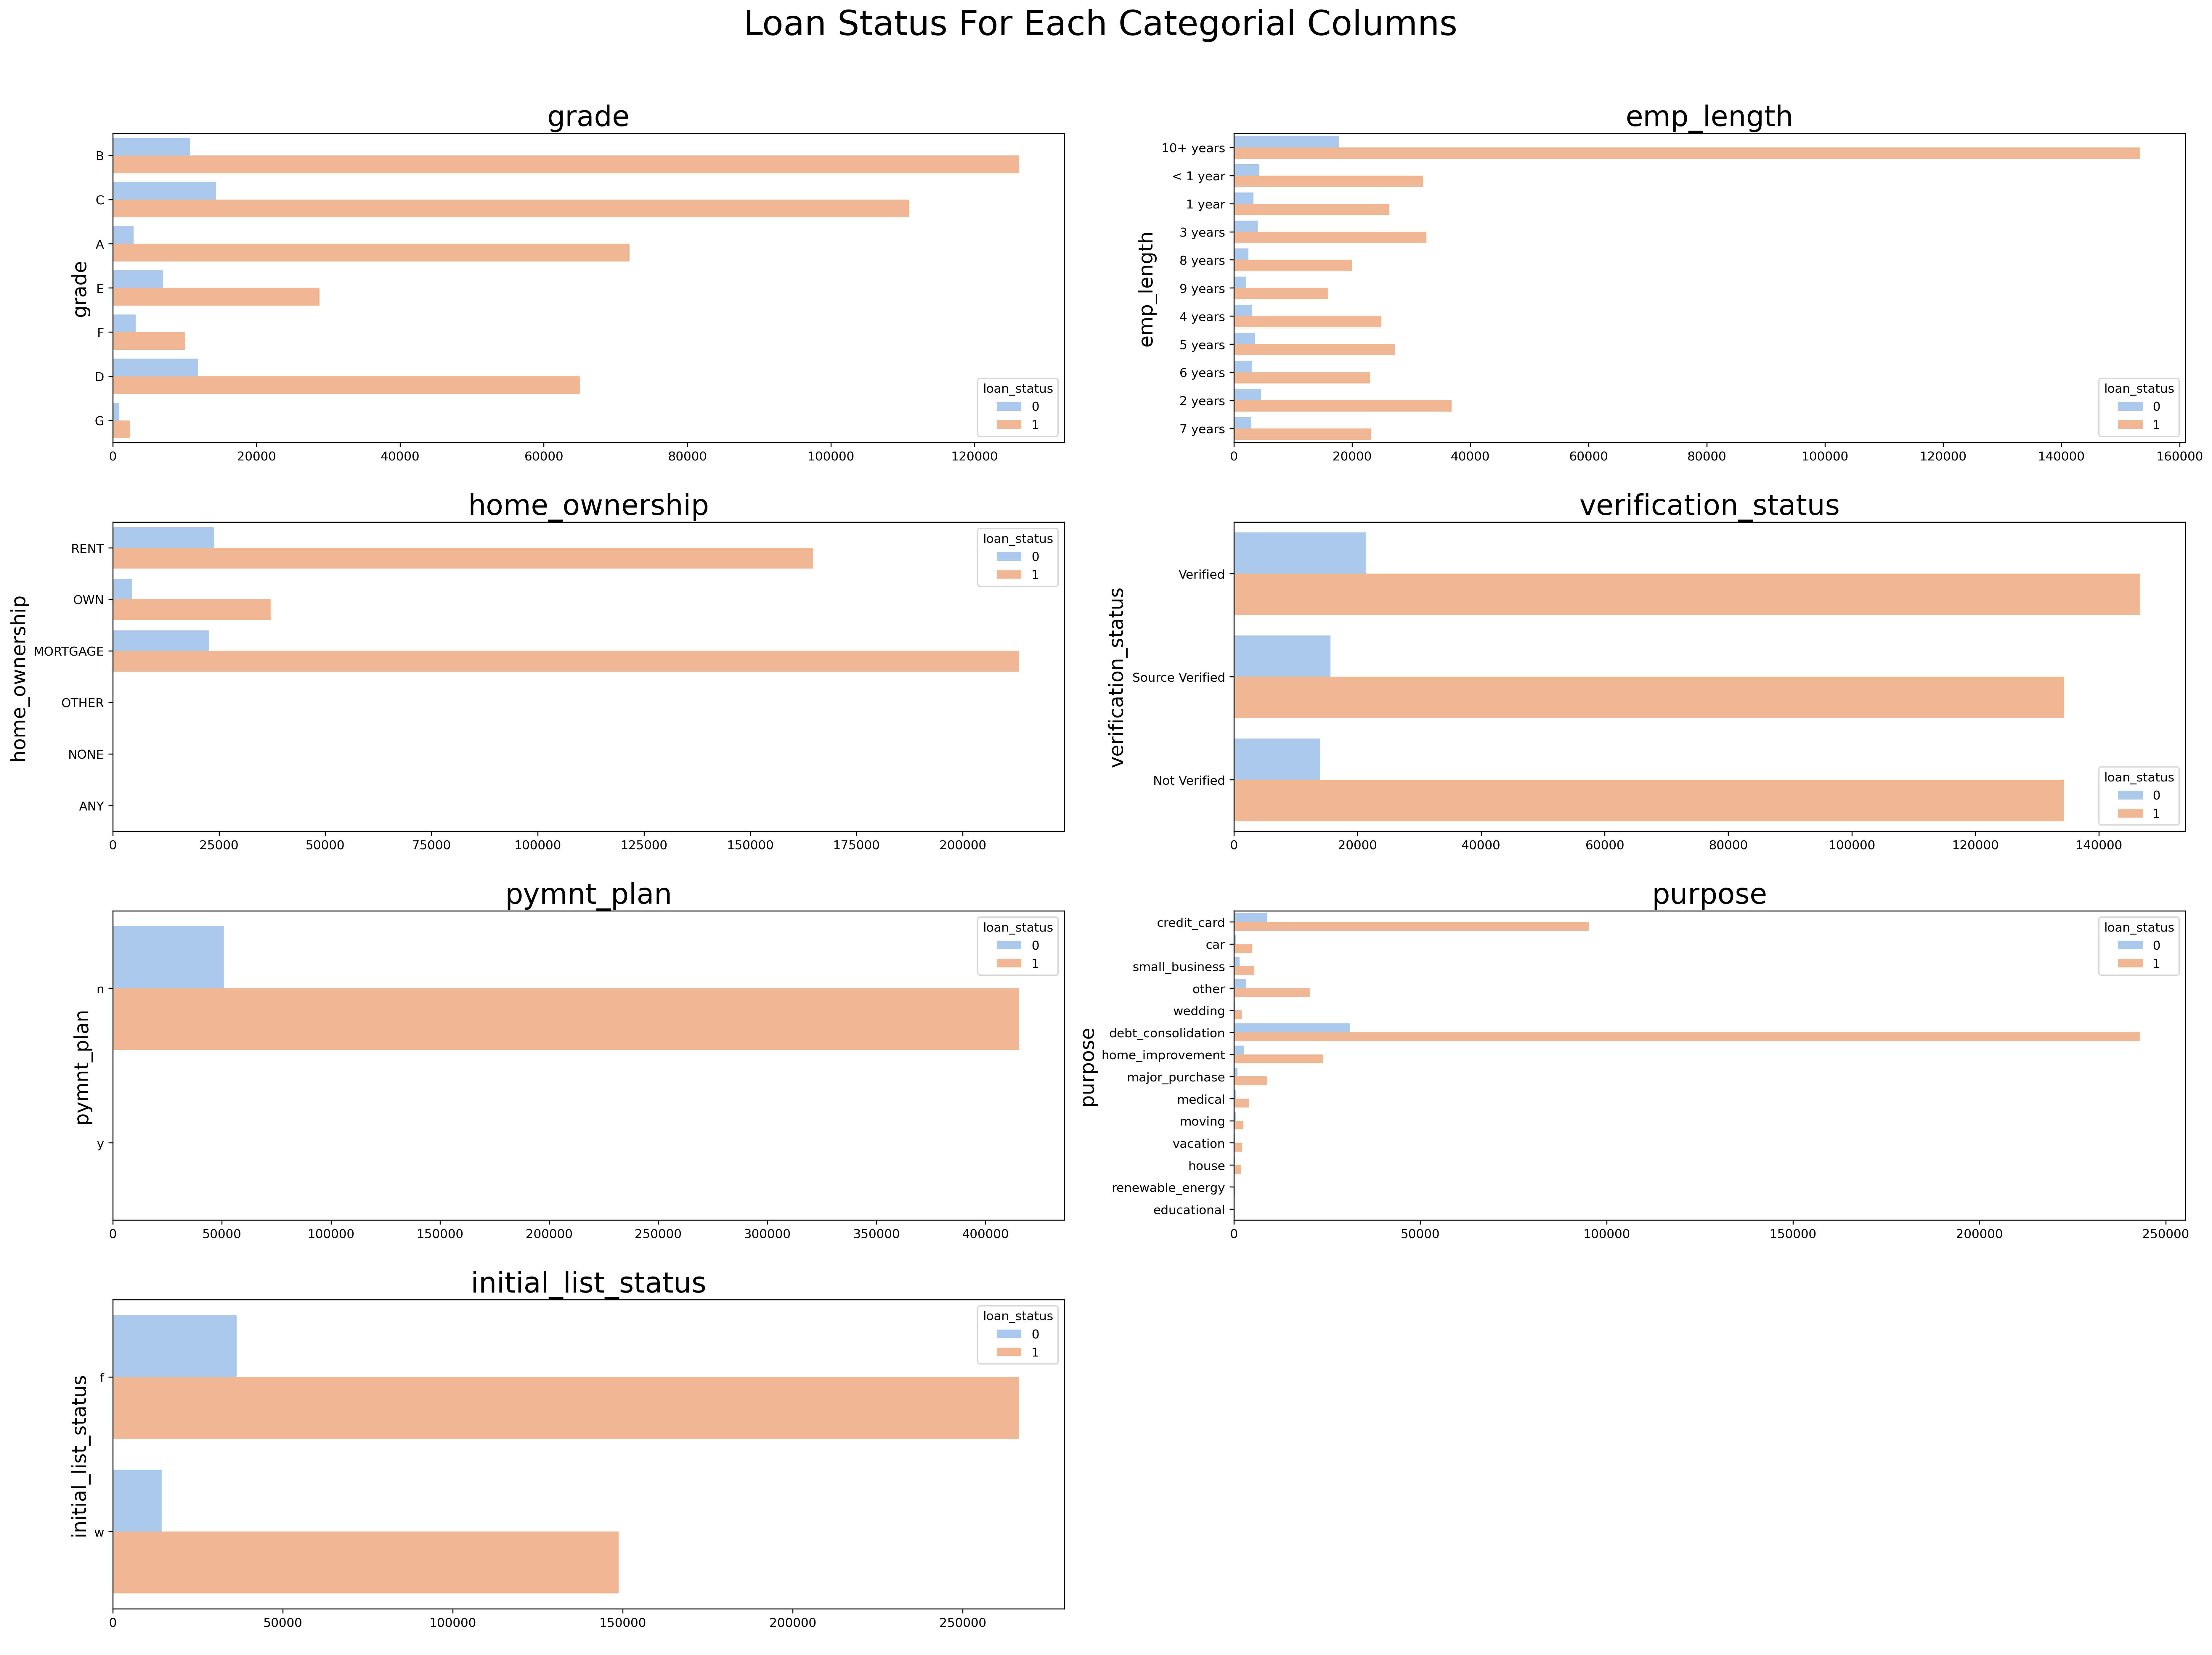

In [59]:
plt.figure(figsize=(25,23), dpi=300)
for i in range(0,len(cat)):
    plt.subplot(5,2,i+1)
    plt.suptitle("Loan Status For Each Categorial Columns \n \n", size=28)
    sns.countplot(y=eda_df[cat[i]], palette='pastel', hue=eda_df['loan_status'])
    plt.title(cat[i], size=23)
    plt.xlabel(' ')
    plt.ylabel(str(cat[i]), size=16)
    plt.tight_layout()

In [60]:
eda_df = eda_df.drop(['pymnt_plan'], axis=1)

In [61]:
eda_df.sample(3)

loan_amnt  term  int_rate grade emp_length home_ownership  annual_inc  \
353978      35000    36     19.52     E    9 years       MORTGAGE    143000.0   
74551        9000    36     17.76     D   < 1 year           RENT     65000.0   
265648      20000    60     15.61     D    8 years       MORTGAGE     70000.0   

       verification_status  loan_status             purpose    dti  \
353978            Verified            1               other  17.97   
74551             Verified            1         credit_card  20.04   
265648     Source Verified            1  debt_consolidation  12.00   

        delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
353978          7.0             0.0      22.0      0.0      25291        63.1   
74551           0.0             2.0      17.0      1.0      15335        33.4   
265648          1.0             0.0      11.0      0.0       9504        45.7   

        total_acc initial_list_status  out_prncp  total_rec_late_fee  \
353978       57.0                   w   20023.49                 0.0   
74551        27.0                   f    2994.03                 0.0   
265648       20.0                   w   16614.06                 0.0   

        recoveries  collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  \
353978         0.0                         0.0             0.0           0.0   
74551          0.0                         0.0             0.0           0.0   
265648         0.0                         0.0             0.0         444.0   

        tot_cur_bal  pymnt_time  credit_pull_year  
353978     263934.0           1                22  
74551       37166.0           2                20  
265648     220120.0           0                12

# Feature Engineering with Weight of Evidence and Information Value (IV)

__Weight of Evidence (WoE)__ and __Information Value (IV)__ can be used __to understand the predictive power of an independent variable__. WoE helps to understand if a particular class of an independent variable has a higher distribution of good or bad.

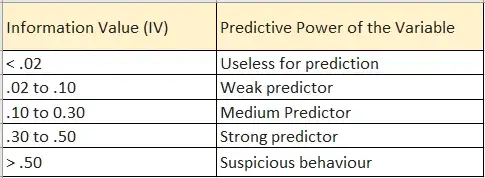

* __Formula__
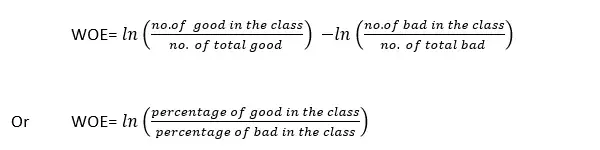

<h4><center>IV= WoE * (proportion of all good in the class — proportion of all bad in the class)</center></h4>

Source : https://medium.com/mlearning-ai/weight-of-evidence-woe-and-information-value-iv-how-to-use-it-in-eda-and-model-building-3b3b98efe0e8

In [62]:
df_fe = eda_df.copy()

In [63]:
import numpy as np
from tabulate import tabulate

# Create Function for Weight of Evidence and Invormation Value
def woe(data, col):
    print("*", col, "column :")
    #count total data in the class
    d = pd.DataFrame(data.groupby([col]).size(), columns=['total_count'])
    
    #count number of good loans in the class
    d['good(1)'] = df_fe.groupby([col])['loan_status'].sum()
    
    #count number of bad loans in the class
    d['bad(0)'] = d['total_count']-d['good(1)']
    
    #weight of evidence : log(number of goods in the class / total goods) - log(number of bads in the class / total bads)
    d['woe'] = np.log(d['good(1)']/d['good(1)'].sum()) - np.log(d['bad(0)']/d['bad(0)'].sum())
    
    #information value = woe * (number of goods in the class / total goods) - (number of bads in the class / total bads)
    d['iv'] = d['woe']*(d['good(1)']/d['good(1)'].sum() - d['bad(0)']/d['bad(0)'].sum())
    
    print(tabulate(d, headers=[col,"count", "good(1)", "bad(0)", "woe", "iv"], tablefmt='fancy_grid'))
    print("Information Value total for {} column = {} \n".format(col, d['iv'].sum()))    
    print("="*len("Information Value total for {} column = {} \n".format(col, d['iv'].sum())))

In [64]:
# Create Function for Weight of Evidence and Invormation Value
def woe2(data, col):
    #count total data in the class
    d = pd.DataFrame(data.groupby([col]).size(), columns=['total_count'])
    
    #count number of good loans in the class
    d['good(1)'] = df_fe.groupby([col])['loan_status'].sum()
    
    #count number of bad loans in the class
    d['bad(0)'] = d['total_count']-d['good(1)']
    
    #weight of evidence : log(number of goods in the class / total goods) - log(number of bads in the class / total bads)
    d['woe'] = np.log(d['good(1)']/d['good(1)'].sum()) - np.log(d['bad(0)']/d['bad(0)'].sum())
    
    #information value = woe * (number of goods in the class / total goods) - (number of bads in the class / total bads)
    d['iv'] = d['woe']*(d['good(1)']/d['good(1)'].sum() - d['bad(0)']/d['bad(0)'].sum())
    
    return d['iv'].sum()

In [65]:
def dist(feature):
    plt.figure(figsize=(4,2))
    sns.violinplot(df_fe[feature],color='#a1c9f4')
    print('Unique Values :',df_fe[feature].nunique())
    print('Data Distribution :')
    print(df_fe[feature].describe().T)

## WOE Categorical Column

In [66]:
for col in df_fe.select_dtypes(include='object').columns:
    woe(df_fe, col)

* grade column :
╒═════════╤═════════╤═══════════╤══════════╤════════════╤═════════════╕
│ grade   │   count │   good(1) │   bad(0) │        woe │          iv │
╞═════════╪═════════╪═══════════╪══════════╪════════════╪═════════════╡
│ A       │   74867 │     71970 │     2897 │  1.11473   │ 0.12981     │
├─────────┼─────────┼───────────┼──────────┼────────────┼─────────────┤
│ B       │  136929 │    126170 │    10759 │  0.364043  │ 0.0337464   │
├─────────┼─────────┼───────────┼──────────┼────────────┼─────────────┤
│ C       │  125293 │    110909 │    14384 │ -0.0552505 │ 0.000838133 │
├─────────┼─────────┼───────────┼──────────┼────────────┼─────────────┤
│ D       │   76888 │     65040 │    11848 │ -0.395001  │ 0.0299633   │
├─────────┼─────────┼───────────┼──────────┼────────────┼─────────────┤
│ E       │   35757 │     28793 │     6964 │ -0.678466  │ 0.0456655   │
├─────────┼─────────┼───────────┼──────────┼────────────┼─────────────┤
│ F       │   13229 │     10037 │     3192 │ -0

╒═══════════════════════╤═════════╤═══════════╤══════════╤═══════════╤════════════╕
│ initial_list_status   │   count │   good(1) │   bad(0) │       woe │         iv │
╞═══════════════════════╪═════════╪═══════════╪══════════╪═══════════╪════════════╡
│ f                     │  303005 │    266551 │    36454 │ -0.10833  │ 0.00795484 │
├───────────────────────┼─────────┼───────────┼──────────┼───────────┼────────────┤
│ w                     │  163280 │    148766 │    14514 │  0.229417 │ 0.0168465  │
╘═══════════════════════╧═════════╧═══════════╧══════════╧═══════════╧════════════╛
Information Value total for initial_list_status column = 0.024801321308399776 



In [67]:
feature = []
iv = []
p_power = []
cols_to_drop = []

for col in df_fe.select_dtypes(include='object').columns:
    feature.append(col)
    information_value = woe2(df_fe, col)
    iv.append(information_value)
    if information_value < 0.02:
        p_power.append("Useless")
        cols_to_drop.append(col)
    elif information_value >= 0.02 and information_value < 0.1:
        p_power.append("Weak")
    elif information_value >= 0.1 and information_value < 0.3:
        p_power.append("Medium")
    elif information_value >= 0.3 and information_value <= 0.5:
        p_power.append("Strong")
    else:
        p_power.append("Suspicious")
        cols_to_drop.append(col)

cat_woe_summary = pd.DataFrame(list(zip(feature, iv, p_power)), 
                               columns =['Columns', 'Information Value', "Predictive Power"])

cat_woe_summary

Columns  Information Value Predictive Power
0                grade           0.290782           Medium
1           emp_length           0.002659          Useless
2       home_ownership                inf       Suspicious
3  verification_status           0.020831             Weak
4              purpose           0.036980             Weak
5  initial_list_status           0.024801             Weak

In [68]:
cols_to_drop

['emp_length', 'home_ownership']

In [69]:
df_fe[df_fe.home_ownership == 'ANY']

loan_amnt  term  int_rate grade emp_length home_ownership  annual_inc  \
311334       5000    36     11.67     B    5 years            ANY     35680.0   

       verification_status  loan_status             purpose    dti  \
311334     Source Verified            1  debt_consolidation  28.12   

        delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
311334          0.0             0.0       7.0      0.0       3319        43.1   

        total_acc initial_list_status  out_prncp  total_rec_late_fee  \
311334       12.0                   f        0.0                 0.0   

        recoveries  collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  \
311334         0.0                         0.0             0.0         152.0   

        tot_cur_bal  pymnt_time  credit_pull_year  
311334     130923.0          16                13

Based on information value from categorical columns,  we decided to __drop column with predictive power other than weak, medium, and strong__. In this case we will drop __emp_length__ and __home_ownership__. But, We can see that __home_ownership have an inf__ information value. This is because on __home_ownership = 'ANY'__ is __not have bad loans__. Consider that the total __information value of home_ownership other than 'ANY' is more than 0.02__, then the __home_ownership column will not drop.__

In [70]:
cols_to_drop = [cols_to_drop[0]]
cols_to_drop

['emp_length']

## WOE Numerical Column

### loan_amnt

Unique Values : 1352
Data Distribution :
count    466285.000000
mean      14317.277577
std        8286.509164
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64


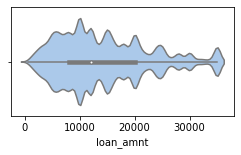

In [71]:
dist('loan_amnt')

We can see that __loan_amount__ have __many unique values__ and also have __long range between 500 to 35000.__ So it's __not relevant__ if we __binning__ them into some group, it will impact the information value. But, consider that __loan amount__ is have impact to __loan_status__, so we will __keep loan_ammnt__ column.

### int_rate

Unique Values : 506
Data Distribution :
count    466285.000000
mean         13.829236
std           4.357587
min           5.420000
25%          10.990000
50%          13.660000
75%          16.490000
max          26.060000
Name: int_rate, dtype: float64


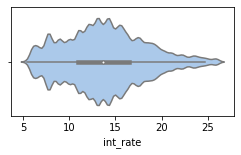

In [72]:
dist('int_rate')

In [73]:
df_fe['int_rate_woe'] = pd.cut(df_fe['int_rate'], 5)
woe(df_fe,'int_rate_woe')

* int_rate_woe column :
╒══════════════════╤═════════╤═══════════╤══════════╤═══════════╤═══════════╕
│ int_rate_woe     │   count │   good(1) │   bad(0) │       woe │        iv │
╞══════════════════╪═════════╪═══════════╪══════════╪═══════════╪═══════════╡
│ (5.399, 9.548]   │   83978 │     80799 │     3179 │  1.13755  │ 0.150357  │
├──────────────────┼─────────┼───────────┼──────────┼───────────┼───────────┤
│ (9.548, 13.676]  │  153360 │    140770 │    12590 │  0.31638  │ 0.0290843 │
├──────────────────┼─────────┼───────────┼──────────┼───────────┼───────────┤
│ (13.676, 17.804] │  147973 │    128776 │    19197 │ -0.194524 │ 0.0129516 │
├──────────────────┼─────────┼───────────┼──────────┼───────────┼───────────┤
│ (17.804, 21.932] │   57785 │     47170 │    10615 │ -0.606354 │ 0.0574169 │
├──────────────────┼─────────┼───────────┼──────────┼───────────┼───────────┤
│ (21.932, 26.06]  │   23189 │     17802 │     5387 │ -0.902522 │ 0.0567056 │
╘══════════════════╧═════════╧══════════

We can see that __int rate__ column have __information value > 0.3__, so it's means that this column have __strong predictive power__.

In [74]:
cols_to_drop.append("int_rate_woe")

### annual_inc

Unique Values : 31901
Data Distribution :
count    4.662850e+05
mean     7.327729e+04
std      5.496334e+04
min      1.896000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.895300e+04
max      7.500000e+06
Name: annual_inc, dtype: float64


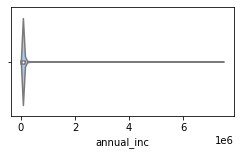

In [75]:
dist('annual_inc')

In [76]:
df_fe['annual_inc_fc'] = np.where((df_fe['annual_inc']>=0)&(df_fe['annual_inc']<=200000),'low_income',
                               np.where((df_fe['annual_inc']>200000)&(df_fe['annual_inc']<=1500000),'med_income','high_income'))
woe(df_fe,'annual_inc_fc')

* annual_inc_fc column :
╒═════════════════╤═════════╤═══════════╤══════════╤══════════════╤═══════════════╕
│ annual_inc_fc   │   count │   good(1) │   bad(0) │          woe │            iv │
╞═════════════════╪═════════╪═══════════╪══════════╪══════════════╪═══════════════╡
│ high_income     │      19 │        19 │        0 │ inf          │ inf           │
├─────────────────┼─────────┼───────────┼──────────┼──────────────┼───────────────┤
│ low_income      │  458485 │    408056 │    50429 │  -0.00700609 │   4.83964e-05 │
├─────────────────┼─────────┼───────────┼──────────┼──────────────┼───────────────┤
│ med_income      │    7781 │      7242 │      539 │   0.500093   │   0.00343165  │
╘═════════════════╧═════════╧═══════════╧══════════╧══════════════╧═══════════════╛
Information Value total for annual_inc_fc column = inf 



We can see that __annual_inc__ column have __useless predictive power__., so we decided to drop it.

In [77]:
cols_to_drop.append("annual_inc")
cols_to_drop.append("annual_inc_fc")

In [78]:
cols_to_drop

['emp_length', 'int_rate_woe', 'annual_inc', 'annual_inc_fc']

### dti

Unique Values : 3997
Data Distribution :
count    466285.000000
mean         17.218758
std           7.851121
min           0.000000
25%          11.360000
50%          16.870000
75%          22.780000
max          39.990000
Name: dti, dtype: float64


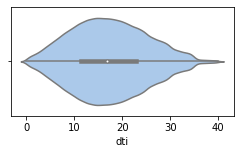

In [79]:
dist('dti')

In [80]:
df_fe['dti_woe'] = pd.cut(df_fe['dti'],5)
woe(df_fe,'dti_woe')

* dti_woe column :
╒══════════════════╤═════════╤═══════════╤══════════╤════════════╤════════════╕
│ dti_woe          │   count │   good(1) │   bad(0) │        woe │         iv │
╞══════════════════╪═════════╪═══════════╪══════════╪════════════╪════════════╡
│ (-0.04, 7.998]   │   59690 │     54428 │     5262 │  0.238523  │ 0.00663345 │
├──────────────────┼─────────┼───────────┼──────────┼────────────┼────────────┤
│ (7.998, 15.996]  │  154680 │    139763 │    14917 │  0.139603  │ 0.00612121 │
├──────────────────┼─────────┼───────────┼──────────┼────────────┼────────────┤
│ (15.996, 23.994] │  155147 │    137023 │    18124 │ -0.0749323 │ 0.00192365 │
├──────────────────┼─────────┼───────────┼──────────┼────────────┼────────────┤
│ (23.994, 31.992] │   80361 │     69844 │    10517 │ -0.204573  │ 0.00780953 │
├──────────────────┼─────────┼───────────┼──────────┼────────────┼────────────┤
│ (31.992, 39.99]  │   16407 │     14259 │     2148 │ -0.204993  │ 0.00160126 │
╘══════════════════╧═

In [81]:
cols_to_drop.append("dti_woe")

### delinq_2yrs

Unique Values : 24
Data Distribution :
count    466285.000000
mean          0.284661
std           0.797343
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          29.000000
Name: delinq_2yrs, dtype: float64


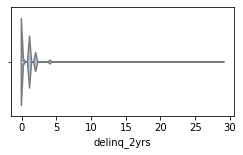

In [82]:
dist('delinq_2yrs')

In [83]:
df_fe['delinq_2yrs_woe'] = pd.cut(df_fe['delinq_2yrs'],3)
woe(df_fe,'delinq_2yrs_woe')

* delinq_2yrs_woe column :
╒═══════════════════╤═════════╤═══════════╤══════════╤══════════════╤═════════════╕
│ delinq_2yrs_woe   │   count │   good(1) │   bad(0) │          woe │          iv │
╞═══════════════════╪═════════╪═══════════╪══════════╪══════════════╪═════════════╡
│ (-0.029, 9.667]   │  466078 │    415142 │    50936 │  0.000206588 │ 4.26564e-08 │
├───────────────────┼─────────┼───────────┼──────────┼──────────────┼─────────────┤
│ (9.667, 19.333]   │     201 │       170 │       31 │ -0.396033    │ 7.87705e-05 │
├───────────────────┼─────────┼───────────┼──────────┼──────────────┼─────────────┤
│ (19.333, 29.0]    │       6 │         5 │        1 │ -0.488406    │ 3.70268e-06 │
╘═══════════════════╧═════════╧═══════════╧══════════╧══════════════╧═════════════╛
Information Value total for delinq_2yrs_woe column = 8.251583406853087e-05 



We can see that __delinq_2yrs__ columns have __useless predictive power__. So, we will drop it.

In [84]:
cols_to_drop.append("delinq_2yrs")
cols_to_drop.append("delinq_2yrs_woe")
cols_to_drop

['emp_length',
 'int_rate_woe',
 'annual_inc',
 'annual_inc_fc',
 'dti_woe',
 'delinq_2yrs',
 'delinq_2yrs_woe']

### inq_last_6mths

Unique Values : 28
Data Distribution :
count    466285.000000
mean          0.804695
std           1.091583
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          33.000000
Name: inq_last_6mths, dtype: float64


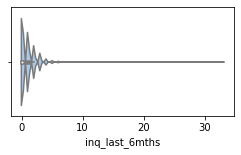

In [85]:
dist('inq_last_6mths')

In [86]:
df_fe['inq_last_6mths_woe'] = pd.cut(df_fe['inq_last_6mths'],4)
woe(df_fe,'inq_last_6mths_woe')

* inq_last_6mths_woe column :
╒══════════════════════╤═════════╤═══════════╤══════════╤══════════════╤═════════════╕
│ inq_last_6mths_woe   │   count │   good(1) │   bad(0) │          woe │          iv │
╞══════════════════════╪═════════╪═══════════╪══════════╪══════════════╪═════════════╡
│ (-0.033, 8.25]       │  466140 │    415221 │    50919 │  0.000730675 │ 5.33567e-07 │
├──────────────────────┼─────────┼───────────┼──────────┼──────────────┼─────────────┤
│ (8.25, 16.5]         │     128 │        86 │       42 │ -1.38117     │ 0.000852146 │
├──────────────────────┼─────────┼───────────┼──────────┼──────────────┼─────────────┤
│ (16.5, 24.75]        │      11 │         7 │        4 │ -1.53823     │ 9.47949e-05 │
├──────────────────────┼─────────┼───────────┼──────────┼──────────────┼─────────────┤
│ (24.75, 33.0]        │       6 │         3 │        3 │ -2.09784     │ 0.000108327 │
╘══════════════════════╧═════════╧═══════════╧══════════╧══════════════╧═════════════╛
Information V

We can see that __inq_last_6mths__ columns have __useless predictive power__. So, we will drop it.

In [87]:
cols_to_drop.append("inq_last_6mths")
cols_to_drop.append("inq_last_6mths_woe")
cols_to_drop

['emp_length',
 'int_rate_woe',
 'annual_inc',
 'annual_inc_fc',
 'dti_woe',
 'delinq_2yrs',
 'delinq_2yrs_woe',
 'inq_last_6mths',
 'inq_last_6mths_woe']

### open_acc

Unique Values : 62
Data Distribution :
count    466285.000000
mean         11.186995
std           4.987380
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          84.000000
Name: open_acc, dtype: float64


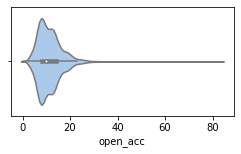

In [88]:
dist('open_acc')

In [89]:
df_fe['open_acc_woe'] = pd.cut(df_fe['open_acc'],4)
woe(df_fe,'open_acc_woe')

* open_acc_woe column :
╒════════════════╤═════════╤═══════════╤══════════╤═════════════╤═════════════╕
│ open_acc_woe   │   count │   good(1) │   bad(0) │         woe │          iv │
╞════════════════╪═════════╪═══════════╪══════════╪═════════════╪═════════════╡
│ (-0.084, 21.0] │  448590 │    399468 │    49122 │ -0.00201744 │ 3.91869e-06 │
├────────────────┼─────────┼───────────┼──────────┼─────────────┼─────────────┤
│ (21.0, 42.0]   │   17588 │     15750 │     1838 │  0.0503182  │ 9.36421e-05 │
├────────────────┼─────────┼───────────┼──────────┼─────────────┼─────────────┤
│ (42.0, 63.0]   │     103 │        97 │        6 │  0.685107   │ 7.93598e-05 │
├────────────────┼─────────┼───────────┼──────────┼─────────────┼─────────────┤
│ (63.0, 84.0]   │       4 │         2 │        2 │ -2.09784    │ 7.22177e-05 │
╘════════════════╧═════════╧═══════════╧══════════╧═════════════╧═════════════╛
Information Value total for open_acc_woe column = 0.0002491382895075133 



We can see that __open_acc__ columns have __useless predictive power__. So, we will drop it.

In [90]:
cols_to_drop.append("open_acc")
cols_to_drop.append("open_acc_woe")
cols_to_drop

['emp_length',
 'int_rate_woe',
 'annual_inc',
 'annual_inc_fc',
 'dti_woe',
 'delinq_2yrs',
 'delinq_2yrs_woe',
 'inq_last_6mths',
 'inq_last_6mths_woe',
 'open_acc',
 'open_acc_woe']

### pub_rec

Unique Values : 26
Data Distribution :
count    466285.000000
mean          0.160554
std           0.510848
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          63.000000
Name: pub_rec, dtype: float64


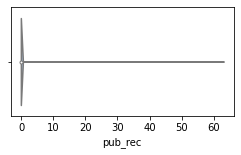

In [91]:
dist('pub_rec')

In [92]:
df_fe['pub_rec_woe'] = pd.cut(df_fe['pub_rec'],2)
woe(df_fe,'pub_rec_woe')

* pub_rec_woe column :
╒════════════════╤═════════╤═══════════╤══════════╤═══════════════╤═══════════════╕
│ pub_rec_woe    │   count │   good(1) │   bad(0) │           woe │            iv │
╞════════════════╪═════════╪═══════════╪══════════╪═══════════════╪═══════════════╡
│ (-0.063, 31.5] │  466280 │    415312 │    50968 │  -1.20391e-05 │   1.44938e-10 │
├────────────────┼─────────┼───────────┼──────────┼───────────────┼───────────────┤
│ (31.5, 63.0]   │       5 │         5 │        0 │ inf           │ inf           │
╘════════════════╧═════════╧═══════════╧══════════╧═══════════════╧═══════════════╛
Information Value total for pub_rec_woe column = inf 



We can see that __pub_rec__ columns have __useless predictive power__. So, we will drop it.

In [93]:
cols_to_drop.append("pub_rec")
cols_to_drop.append("pub_rec_woe")
cols_to_drop

['emp_length',
 'int_rate_woe',
 'annual_inc',
 'annual_inc_fc',
 'dti_woe',
 'delinq_2yrs',
 'delinq_2yrs_woe',
 'inq_last_6mths',
 'inq_last_6mths_woe',
 'open_acc',
 'open_acc_woe',
 'pub_rec',
 'pub_rec_woe']

### revol_bal

Unique Values : 58142
Data Distribution :
count    4.662850e+05
mean     1.623020e+04
std      2.067625e+04
min      0.000000e+00
25%      6.413000e+03
50%      1.176400e+04
75%      2.033300e+04
max      2.568995e+06
Name: revol_bal, dtype: float64


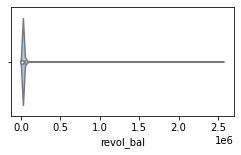

In [94]:
dist('revol_bal')

In [95]:
df_fe['revol_bal_fc'] = np.where((df_fe['revol_bal']>=0)&(df_fe['revol_bal']<=5000),0,
                               np.where((df_fe['revol_bal']>5000)&(df_fe['revol_bal']<=10000),1,
                               np.where((df_fe['revol_bal']>10000)&(df_fe['revol_bal']<=15000),2,3)))
woe(df_fe,'revol_bal_fc')

* revol_bal_fc column :
╒════════════════╤═════════╤═══════════╤══════════╤════════════╤═════════════╕
│   revol_bal_fc │   count │   good(1) │   bad(0) │        woe │          iv │
╞════════════════╪═════════╪═══════════╪══════════╪════════════╪═════════════╡
│              0 │   82590 │     73258 │     9332 │ -0.037306  │ 0.000250126 │
├────────────────┼─────────┼───────────┼──────────┼────────────┼─────────────┤
│              1 │  115537 │    102407 │    13130 │ -0.0437887 │ 0.000483301 │
├────────────────┼─────────┼───────────┼──────────┼────────────┼─────────────┤
│              2 │   88805 │     78768 │    10037 │ -0.0376155 │ 0.000273463 │
├────────────────┼─────────┼───────────┼──────────┼────────────┼─────────────┤
│              3 │  179353 │    160884 │    18469 │  0.0667459 │ 0.00166943  │
╘════════════════╧═════════╧═══════════╧══════════╧════════════╧═════════════╛
Information Value total for revol_bal_fc column = 0.0026763218163413497 



We can see that __revol_bal__ columns have __useless predictive power__. So, we will drop it.

In [96]:
cols_to_drop.append("revol_bal")
cols_to_drop.append("revol_bal_fc")
cols_to_drop

['emp_length',
 'int_rate_woe',
 'annual_inc',
 'annual_inc_fc',
 'dti_woe',
 'delinq_2yrs',
 'delinq_2yrs_woe',
 'inq_last_6mths',
 'inq_last_6mths_woe',
 'open_acc',
 'open_acc_woe',
 'pub_rec',
 'pub_rec_woe',
 'revol_bal',
 'revol_bal_fc']

### revol_util

Unique Values : 1269
Data Distribution :
count    466285.000000
mean         56.177985
std          23.724005
min           0.000000
25%          39.200000
50%          57.600000
75%          74.700000
max         892.300000
Name: revol_util, dtype: float64


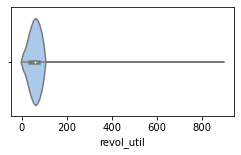

In [97]:
dist('revol_util')

In [98]:
df_fe['revol_util_fc'] = np.where((df_fe['revol_util']>=0)&(df_fe['revol_util']<=20),0,
                                  np.where((df_fe['revol_util']>20)&(df_fe['revol_util']<=40),1,
                                           np.where((df_fe['revol_util']>40)&(df_fe['revol_util']<=60),2,
                                                    np.where((df_fe['revol_util']>60)&(df_fe['revol_util']<=80),3,4))))
woe(df_fe,'revol_util_fc')

* revol_util_fc column :
╒═════════════════╤═════════╤═══════════╤══════════╤════════════╤═════════════╕
│   revol_util_fc │   count │   good(1) │   bad(0) │        woe │          iv │
╞═════════════════╪═════════╪═══════════╪══════════╪════════════╪═════════════╡
│               0 │   37402 │     34317 │     3085 │  0.311245  │ 0.0068786   │
├─────────────────┼─────────┼───────────┼──────────┼────────────┼─────────────┤
│               1 │   83492 │     75847 │     7645 │  0.196822  │ 0.00642197  │
├─────────────────┼─────────┼───────────┼──────────┼────────────┼─────────────┤
│               2 │  129737 │    116160 │    13577 │  0.0487473 │ 0.000648687 │
├─────────────────┼─────────┼───────────┼──────────┼────────────┼─────────────┤
│               3 │  131592 │    116090 │    15502 │ -0.0844474 │ 0.00207996  │
├─────────────────┼─────────┼───────────┼──────────┼────────────┼─────────────┤
│               4 │   84062 │     72903 │    11159 │ -0.220961  │ 0.00959091  │
╘══════════════

In [99]:
cols_to_drop.append("revol_util_fc")
cols_to_drop

['emp_length',
 'int_rate_woe',
 'annual_inc',
 'annual_inc_fc',
 'dti_woe',
 'delinq_2yrs',
 'delinq_2yrs_woe',
 'inq_last_6mths',
 'inq_last_6mths_woe',
 'open_acc',
 'open_acc_woe',
 'pub_rec',
 'pub_rec_woe',
 'revol_bal',
 'revol_bal_fc',
 'revol_util_fc']

### total_acc

Unique Values : 112
Data Distribution :
count    466285.000000
mean         25.064302
std          11.599792
min           1.000000
25%          17.000000
50%          23.000000
75%          32.000000
max         156.000000
Name: total_acc, dtype: float64


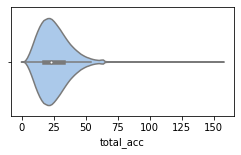

In [100]:
dist('total_acc')

In [101]:
df_fe['total_acc_woe'] = pd.cut(df_fe['total_acc'],5)
woe(df_fe,'total_acc_woe')

* total_acc_woe column :
╒═════════════════╤═════════╤═══════════╤══════════╤═════════════╤═══════════════╕
│ total_acc_woe   │   count │   good(1) │   bad(0) │         woe │            iv │
╞═════════════════╪═════════╪═══════════╪══════════╪═════════════╪═══════════════╡
│ (0.845, 32.0]   │  357215 │    317262 │    39953 │  -0.0258199 │   0.000515902 │
├─────────────────┼─────────┼───────────┼──────────┼─────────────┼───────────────┤
│ (32.0, 63.0]    │  107819 │     96910 │    10909 │   0.0863505 │   0.00166687  │
├─────────────────┼─────────┼───────────┼──────────┼─────────────┼───────────────┤
│ (63.0, 94.0]    │    1221 │      1116 │      105 │   0.265702  │   0.000166592 │
├─────────────────┼─────────┼───────────┼──────────┼─────────────┼───────────────┤
│ (94.0, 125.0]   │      28 │        27 │        1 │   1.19799   │   5.43774e-05 │
├─────────────────┼─────────┼───────────┼──────────┼─────────────┼───────────────┤
│ (125.0, 156.0]  │       2 │         2 │        0 │ inf      

We can see that __total_acc__ columns have __useless predictive power__. So, we will drop it.

In [102]:
cols_to_drop.append("total_acc")
cols_to_drop.append("total_acc_woe")
cols_to_drop

['emp_length',
 'int_rate_woe',
 'annual_inc',
 'annual_inc_fc',
 'dti_woe',
 'delinq_2yrs',
 'delinq_2yrs_woe',
 'inq_last_6mths',
 'inq_last_6mths_woe',
 'open_acc',
 'open_acc_woe',
 'pub_rec',
 'pub_rec_woe',
 'revol_bal',
 'revol_bal_fc',
 'revol_util_fc',
 'total_acc',
 'total_acc_woe']

### out_prncp

Unique Values : 135665
Data Distribution :
count    466285.000000
mean       4410.062342
std        6355.078769
min           0.000000
25%           0.000000
50%         441.470000
75%        7341.650000
max       32160.380000
Name: out_prncp, dtype: float64


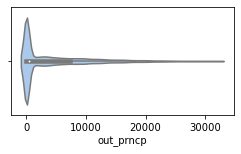

In [103]:
dist('out_prncp')

In [104]:
df_fe['out_prncp_woe'] = pd.cut(df_fe['out_prncp'],10)
woe(df_fe,'out_prncp_woe')

* out_prncp_woe column :
╒════════════════════════╤═════════╤═══════════╤══════════╤════════════╤═════════════╕
│ out_prncp_woe          │   count │   good(1) │   bad(0) │        woe │          iv │
╞════════════════════════╪═════════╪═══════════╪══════════╪════════════╪═════════════╡
│ (-32.16, 3216.038]     │  284157 │    239715 │    44442 │ -0.412578  │ 0.121617    │
├────────────────────────┼─────────┼───────────┼──────────┼────────────┼─────────────┤
│ (3216.038, 6432.076]   │   53837 │     52134 │     1703 │  1.32358   │ 0.121922    │
├────────────────────────┼─────────┼───────────┼──────────┼────────────┼─────────────┤
│ (6432.076, 9648.114]   │   40780 │     39434 │     1346 │  1.27965   │ 0.0877076   │
├────────────────────────┼─────────┼───────────┼──────────┼────────────┼─────────────┤
│ (9648.114, 12864.152]  │   32345 │     31164 │     1181 │  1.17506   │ 0.0609447   │
├────────────────────────┼─────────┼───────────┼──────────┼────────────┼─────────────┤
│ (12864.152, 1608

We can see that __out_prncp__ columns have __strong predictive power__. So, we will keep it.

In [105]:
cols_to_drop.append("out_prncp_woe")
cols_to_drop

['emp_length',
 'int_rate_woe',
 'annual_inc',
 'annual_inc_fc',
 'dti_woe',
 'delinq_2yrs',
 'delinq_2yrs_woe',
 'inq_last_6mths',
 'inq_last_6mths_woe',
 'open_acc',
 'open_acc_woe',
 'pub_rec',
 'pub_rec_woe',
 'revol_bal',
 'revol_bal_fc',
 'revol_util_fc',
 'total_acc',
 'total_acc_woe',
 'out_prncp_woe']

### total_rec_late_fee

Unique Values : 5808
Data Distribution :
count    466285.000000
mean          0.650129
std           5.265730
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         358.680000
Name: total_rec_late_fee, dtype: float64


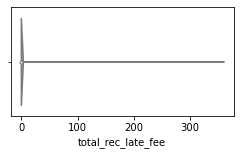

In [106]:
dist('total_rec_late_fee')

In [107]:
df_fe['total_rec_late_fee_woe'] = pd.cut(df_fe['total_rec_late_fee'],5)
woe(df_fe,'total_rec_late_fee_woe')

* total_rec_late_fee_woe column :
╒══════════════════════════╤═════════╤═══════════╤══════════╤═══════════════╤═══════════════╕
│ total_rec_late_fee_woe   │   count │   good(1) │   bad(0) │           woe │            iv │
╞══════════════════════════╪═════════╪═══════════╪══════════╪═══════════════╪═══════════════╡
│ (-0.359, 71.736]         │  465887 │    415128 │    50759 │    0.00365387 │   1.33203e-05 │
├──────────────────────────┼─────────┼───────────┼──────────┼───────────────┼───────────────┤
│ (71.736, 143.472]        │     364 │       172 │      192 │   -2.20784    │   0.00740275  │
├──────────────────────────┼─────────┼───────────┼──────────┼───────────────┼───────────────┤
│ (143.472, 215.208]       │      27 │        14 │       13 │   -2.02374    │   0.00044796  │
├──────────────────────────┼─────────┼───────────┼──────────┼───────────────┼───────────────┤
│ (215.208, 286.944]       │       5 │         3 │        2 │   -1.69238    │   5.41847e-05 │
├─────────────────────────

We can see that __total_rec_late_fee__ columns have __useless predictive power__. So, we will drop it.

In [108]:
cols_to_drop.append("total_rec_late_fee")
cols_to_drop.append("total_rec_late_fee_woe")
cols_to_drop

['emp_length',
 'int_rate_woe',
 'annual_inc',
 'annual_inc_fc',
 'dti_woe',
 'delinq_2yrs',
 'delinq_2yrs_woe',
 'inq_last_6mths',
 'inq_last_6mths_woe',
 'open_acc',
 'open_acc_woe',
 'pub_rec',
 'pub_rec_woe',
 'revol_bal',
 'revol_bal_fc',
 'revol_util_fc',
 'total_acc',
 'total_acc_woe',
 'out_prncp_woe',
 'total_rec_late_fee',
 'total_rec_late_fee_woe']

### recoveries

Unique Values : 22773
Data Distribution :
count    466285.000000
mean         85.344211
std         552.216084
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       33520.270000
Name: recoveries, dtype: float64


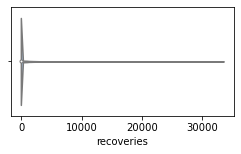

In [109]:
dist('recoveries')

In [110]:
df_fe['recoveries_woe'] = pd.cut(df_fe['recoveries'],10)
woe(df_fe,'recoveries_woe')

* recoveries_woe column :
╒════════════════════════╤═════════╤═══════════╤══════════╤══════════════╤══════════════╕
│ recoveries_woe         │   count │   good(1) │   bad(0) │          woe │           iv │
╞════════════════════════╪═════════╪═══════════╪══════════╪══════════════╪══════════════╡
│ (-33.52, 3352.027]     │  463243 │    415317 │    47926 │    0.0615398 │   0.00367297 │
├────────────────────────┼─────────┼───────────┼──────────┼──────────────┼──────────────┤
│ (3352.027, 6704.054]   │    2664 │         0 │     2664 │ -inf         │ inf          │
├────────────────────────┼─────────┼───────────┼──────────┼──────────────┼──────────────┤
│ (6704.054, 10056.081]  │     241 │         0 │      241 │ -inf         │ inf          │
├────────────────────────┼─────────┼───────────┼──────────┼──────────────┼──────────────┤
│ (10056.081, 13408.108] │      74 │         0 │       74 │ -inf         │ inf          │
├────────────────────────┼─────────┼───────────┼──────────┼──────────────┼

We can see that __recoveries__ columns have __useless predictive power__. So, we will drop it.

In [111]:
cols_to_drop.append("recoveries")
cols_to_drop.append("recoveries_woe")
cols_to_drop

['emp_length',
 'int_rate_woe',
 'annual_inc',
 'annual_inc_fc',
 'dti_woe',
 'delinq_2yrs',
 'delinq_2yrs_woe',
 'inq_last_6mths',
 'inq_last_6mths_woe',
 'open_acc',
 'open_acc_woe',
 'pub_rec',
 'pub_rec_woe',
 'revol_bal',
 'revol_bal_fc',
 'revol_util_fc',
 'total_acc',
 'total_acc_woe',
 'out_prncp_woe',
 'total_rec_late_fee',
 'total_rec_late_fee_woe',
 'recoveries',
 'recoveries_woe']

### collections_12_mths_ex_med

Unique Values : 9
Data Distribution :
count    466285.000000
mean          0.009082
std           0.108632
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          20.000000
Name: collections_12_mths_ex_med, dtype: float64


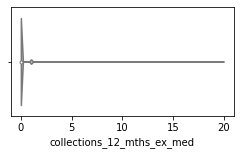

In [112]:
dist('collections_12_mths_ex_med')

In [113]:
df_fe['collections_12_mths_ex_med_woe'] = pd.cut(df_fe['collections_12_mths_ex_med'],3)
woe(df_fe,'collections_12_mths_ex_med_woe')

* collections_12_mths_ex_med_woe column :
╒══════════════════════════════════╤═════════╤═══════════╤══════════╤═══════════════╤═════════════╕
│ collections_12_mths_ex_med_woe   │   count │   good(1) │   bad(0) │           woe │          iv │
╞══════════════════════════════════╪═════════╪═══════════╪══════════╪═══════════════╪═════════════╡
│ (-0.02, 6.667]                   │  466283 │    415315 │    50968 │  -4.81561e-06 │   2.319e-11 │
├──────────────────────────────────┼─────────┼───────────┼──────────┼───────────────┼─────────────┤
│ (6.667, 13.333]                  │       0 │         0 │        0 │ nan           │ nan         │
├──────────────────────────────────┼─────────┼───────────┼──────────┼───────────────┼─────────────┤
│ (13.333, 20.0]                   │       2 │         2 │        0 │ inf           │ inf         │
╘══════════════════════════════════╧═════════╧═══════════╧══════════╧═══════════════╧═════════════╛
Information Value total for collections_12_mths_ex_med_woe

We can see that __collections_12_mths_ex_med__ columns have __useless predictive power__. So, we will drop it.

In [114]:
cols_to_drop.append("collections_12_mths_ex_med")
cols_to_drop.append("collections_12_mths_ex_med_woe")
cols_to_drop

['emp_length',
 'int_rate_woe',
 'annual_inc',
 'annual_inc_fc',
 'dti_woe',
 'delinq_2yrs',
 'delinq_2yrs_woe',
 'inq_last_6mths',
 'inq_last_6mths_woe',
 'open_acc',
 'open_acc_woe',
 'pub_rec',
 'pub_rec_woe',
 'revol_bal',
 'revol_bal_fc',
 'revol_util_fc',
 'total_acc',
 'total_acc_woe',
 'out_prncp_woe',
 'total_rec_late_fee',
 'total_rec_late_fee_woe',
 'recoveries',
 'recoveries_woe',
 'collections_12_mths_ex_med',
 'collections_12_mths_ex_med_woe']

### acc_now_delinq

Unique Values : 6
Data Distribution :
count    466285.000000
mean          0.004002
std           0.068635
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: acc_now_delinq, dtype: float64


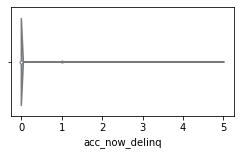

In [115]:
dist('acc_now_delinq')

In [116]:
df_fe['acc_now_delinq_woe'] = pd.cut(df_fe['acc_now_delinq'],2)
woe(df_fe,'acc_now_delinq_woe')

* acc_now_delinq_woe column :
╒══════════════════════╤═════════╤═══════════╤══════════╤══════════════╤═════════════╕
│ acc_now_delinq_woe   │   count │   good(1) │   bad(0) │          woe │          iv │
╞══════════════════════╪═════════╪═══════════╪══════════╪══════════════╪═════════════╡
│ (-0.005, 2.5]        │  466268 │    415303 │    50965 │  2.51524e-05 │ 6.32616e-10 │
├──────────────────────┼─────────┼───────────┼──────────┼──────────────┼─────────────┤
│ (2.5, 5.0]           │      17 │        14 │        3 │ -0.557399    │ 1.40193e-05 │
╘══════════════════════╧═════════╧═══════════╧══════════╧══════════════╧═════════════╛
Information Value total for acc_now_delinq_woe column = 1.4019927193971082e-05 



We can see that __acc_now_delinq__ columns have __useless predictive power__. So, we will drop it.

In [117]:
cols_to_drop.append("acc_now_delinq")
cols_to_drop.append("acc_now_delinq_woe")
cols_to_drop

['emp_length',
 'int_rate_woe',
 'annual_inc',
 'annual_inc_fc',
 'dti_woe',
 'delinq_2yrs',
 'delinq_2yrs_woe',
 'inq_last_6mths',
 'inq_last_6mths_woe',
 'open_acc',
 'open_acc_woe',
 'pub_rec',
 'pub_rec_woe',
 'revol_bal',
 'revol_bal_fc',
 'revol_util_fc',
 'total_acc',
 'total_acc_woe',
 'out_prncp_woe',
 'total_rec_late_fee',
 'total_rec_late_fee_woe',
 'recoveries',
 'recoveries_woe',
 'collections_12_mths_ex_med',
 'collections_12_mths_ex_med_woe',
 'acc_now_delinq',
 'acc_now_delinq_woe']

### tot_coll_amt

Unique Values : 6321
Data Distribution :
count    4.662850e+05
mean     1.629893e+02
std      1.348289e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.152545e+06
Name: tot_coll_amt, dtype: float64


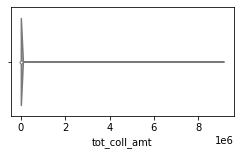

In [118]:
dist('tot_coll_amt')

In [119]:
df_fe['tot_coll_amt_woe'] = pd.cut(df_fe['tot_coll_amt'],5)
woe(df_fe,'tot_coll_amt_woe')

* tot_coll_amt_woe column :
╒════════════════════════╤═════════╤═══════════╤══════════╤══════════════╤══════════════╕
│ tot_coll_amt_woe       │   count │   good(1) │   bad(0) │          woe │           iv │
╞════════════════════════╪═════════╪═══════════╪══════════╪══════════════╪══════════════╡
│ (-9152.545, 1830509.0] │  466284 │    415316 │    50968 │  -2.4078e-06 │   5.7975e-12 │
├────────────────────────┼─────────┼───────────┼──────────┼──────────────┼──────────────┤
│ (1830509.0, 3661018.0] │       0 │         0 │        0 │ nan          │ nan          │
├────────────────────────┼─────────┼───────────┼──────────┼──────────────┼──────────────┤
│ (3661018.0, 5491527.0] │       0 │         0 │        0 │ nan          │ nan          │
├────────────────────────┼─────────┼───────────┼──────────┼──────────────┼──────────────┤
│ (5491527.0, 7322036.0] │       0 │         0 │        0 │ nan          │ nan          │
├────────────────────────┼─────────┼───────────┼──────────┼─────────────

We can see that __acc_now_delinq__ columns have __useless predictive power__. So, we will drop it.

In [120]:
cols_to_drop.append("tot_coll_amt")
cols_to_drop.append("tot_coll_amt_woe")
cols_to_drop

['emp_length',
 'int_rate_woe',
 'annual_inc',
 'annual_inc_fc',
 'dti_woe',
 'delinq_2yrs',
 'delinq_2yrs_woe',
 'inq_last_6mths',
 'inq_last_6mths_woe',
 'open_acc',
 'open_acc_woe',
 'pub_rec',
 'pub_rec_woe',
 'revol_bal',
 'revol_bal_fc',
 'revol_util_fc',
 'total_acc',
 'total_acc_woe',
 'out_prncp_woe',
 'total_rec_late_fee',
 'total_rec_late_fee_woe',
 'recoveries',
 'recoveries_woe',
 'collections_12_mths_ex_med',
 'collections_12_mths_ex_med_woe',
 'acc_now_delinq',
 'acc_now_delinq_woe',
 'tot_coll_amt',
 'tot_coll_amt_woe']

### tot_cur_bal

Unique Values : 220690
Data Distribution :
count    4.662850e+05
mean     1.178823e+05
std      1.487196e+05
min      0.000000e+00
25%      1.546700e+04
50%      5.247900e+04
75%      1.849300e+05
max      8.000078e+06
Name: tot_cur_bal, dtype: float64


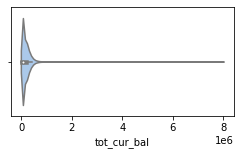

In [121]:
dist('tot_cur_bal')

In [122]:
df_fe['tot_cur_bal_woe'] = pd.cut(df_fe['tot_cur_bal'],5)
woe(df_fe,'tot_cur_bal_woe')

* tot_cur_bal_woe column :
╒════════════════════════╤═════════╤═══════════╤══════════╤═══════════════╤═══════════════╕
│ tot_cur_bal_woe        │   count │   good(1) │   bad(0) │           woe │            iv │
╞════════════════════════╪═════════╪═══════════╪══════════╪═══════════════╪═══════════════╡
│ (-8000.078, 1600015.6] │  466165 │    415205 │    50960 │  -0.000112736 │   1.27068e-08 │
├────────────────────────┼─────────┼───────────┼──────────┼───────────────┼───────────────┤
│ (1600015.6, 3200031.2] │     108 │       101 │        7 │   0.571366    │   6.04772e-05 │
├────────────────────────┼─────────┼───────────┼──────────┼───────────────┼───────────────┤
│ (3200031.2, 4800046.8] │      11 │        10 │        1 │   0.204741    │   9.12703e-07 │
├────────────────────────┼─────────┼───────────┼──────────┼───────────────┼───────────────┤
│ (4800046.8, 6400062.4] │       0 │         0 │        0 │ nan           │ nan           │
├────────────────────────┼─────────┼───────────┼─────

We can see that __tot_cur_bal__ columns have __useless predictive power__. So, we will drop it.

In [123]:
cols_to_drop.append("tot_cur_bal")
cols_to_drop.append("tot_cur_bal_woe")
cols_to_drop

['emp_length',
 'int_rate_woe',
 'annual_inc',
 'annual_inc_fc',
 'dti_woe',
 'delinq_2yrs',
 'delinq_2yrs_woe',
 'inq_last_6mths',
 'inq_last_6mths_woe',
 'open_acc',
 'open_acc_woe',
 'pub_rec',
 'pub_rec_woe',
 'revol_bal',
 'revol_bal_fc',
 'revol_util_fc',
 'total_acc',
 'total_acc_woe',
 'out_prncp_woe',
 'total_rec_late_fee',
 'total_rec_late_fee_woe',
 'recoveries',
 'recoveries_woe',
 'collections_12_mths_ex_med',
 'collections_12_mths_ex_med_woe',
 'acc_now_delinq',
 'acc_now_delinq_woe',
 'tot_coll_amt',
 'tot_coll_amt_woe',
 'tot_cur_bal',
 'tot_cur_bal_woe']

### pymnt_time

Unique Values : 98
Data Distribution :
count    466285.000000
mean          8.911018
std          12.253806
min           0.000000
25%           1.000000
50%           2.000000
75%          13.000000
max          97.000000
Name: pymnt_time, dtype: float64


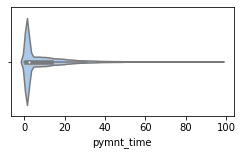

In [124]:
dist('pymnt_time')

In [125]:
df_fe['pymnt_time_fc'] = np.where((df_fe['pymnt_time']>=0)&(df_fe['pymnt_time']<=1),0,
                               np.where((df_fe['pymnt_time']>1)&(df_fe['pymnt_time']<=6),1,
                               np.where((df_fe['pymnt_time']>6)&(df_fe['pymnt_time']<=12),2,3)))
woe(df_fe,'pymnt_time_fc')

* pymnt_time_fc column :
╒═════════════════╤═════════╤═══════════╤══════════╤════════════╤═════════════╕
│   pymnt_time_fc │   count │   good(1) │   bad(0) │        woe │          iv │
╞═════════════════╪═════════╪═══════════╪══════════╪════════════╪═════════════╡
│               0 │  193419 │    192138 │     1281 │  2.91273   │ 1.27431     │
├─────────────────┼─────────┼───────────┼──────────┼────────────┼─────────────┤
│               1 │   91812 │     82083 │     9729 │  0.0347757 │ 0.000234907 │
├─────────────────┼─────────┼───────────┼──────────┼────────────┼─────────────┤
│               2 │   60123 │     47636 │    12487 │ -0.758943  │ 0.0988895   │
├─────────────────┼─────────┼───────────┼──────────┼────────────┼─────────────┤
│               3 │  120931 │     93460 │    27471 │ -0.873441  │ 0.274219    │
╘═════════════════╧═════════╧═══════════╧══════════╧════════════╧═════════════╛
Information Value total for pymnt_time_fc column = 1.647651541731387 



We try to keep this column

In [126]:
cols_to_drop.append("pymnt_time_fc")
cols_to_drop

['emp_length',
 'int_rate_woe',
 'annual_inc',
 'annual_inc_fc',
 'dti_woe',
 'delinq_2yrs',
 'delinq_2yrs_woe',
 'inq_last_6mths',
 'inq_last_6mths_woe',
 'open_acc',
 'open_acc_woe',
 'pub_rec',
 'pub_rec_woe',
 'revol_bal',
 'revol_bal_fc',
 'revol_util_fc',
 'total_acc',
 'total_acc_woe',
 'out_prncp_woe',
 'total_rec_late_fee',
 'total_rec_late_fee_woe',
 'recoveries',
 'recoveries_woe',
 'collections_12_mths_ex_med',
 'collections_12_mths_ex_med_woe',
 'acc_now_delinq',
 'acc_now_delinq_woe',
 'tot_coll_amt',
 'tot_coll_amt_woe',
 'tot_cur_bal',
 'tot_cur_bal_woe',
 'pymnt_time_fc']

### credit_pull_year

Unique Values : 47
Data Distribution :
count    466285.000000
mean         18.267693
std           7.279543
min           1.000000
25%          13.000000
50%          17.000000
75%          22.000000
max          47.000000
Name: credit_pull_year, dtype: float64


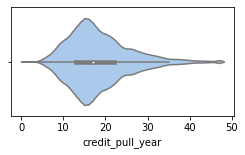

In [127]:
dist('credit_pull_year')

In [128]:
df_fe['credit_pull_year_woe'] = pd.cut(df_fe['credit_pull_year'],6)
woe(df_fe,'credit_pull_year_woe')

* credit_pull_year_woe column :
╒════════════════════════╤═════════╤═══════════╤══════════╤════════════╤═════════════╕
│ credit_pull_year_woe   │   count │   good(1) │   bad(0) │        woe │          iv │
╞════════════════════════╪═════════╪═══════════╪══════════╪════════════╪═════════════╡
│ (0.954, 8.667]         │   22402 │     18537 │     3865 │ -0.530037  │ 0.0165364   │
├────────────────────────┼─────────┼───────────┼──────────┼────────────┼─────────────┤
│ (8.667, 16.333]        │  198104 │    174542 │    23562 │ -0.0953139 │ 0.00400585  │
├────────────────────────┼─────────┼───────────┼──────────┼────────────┼─────────────┤
│ (16.333, 24.0]         │  164068 │    147716 │    16352 │  0.103097  │ 0.00359209  │
├────────────────────────┼─────────┼───────────┼──────────┼────────────┼─────────────┤
│ (24.0, 31.667]         │   54831 │     49893 │     4938 │  0.215076  │ 0.00500009  │
├────────────────────────┼─────────┼───────────┼──────────┼────────────┼─────────────┤
│ (31.667, 

In [129]:
cols_to_drop.append("credit_pull_year_woe")

In [130]:
cols_to_drop

['emp_length',
 'int_rate_woe',
 'annual_inc',
 'annual_inc_fc',
 'dti_woe',
 'delinq_2yrs',
 'delinq_2yrs_woe',
 'inq_last_6mths',
 'inq_last_6mths_woe',
 'open_acc',
 'open_acc_woe',
 'pub_rec',
 'pub_rec_woe',
 'revol_bal',
 'revol_bal_fc',
 'revol_util_fc',
 'total_acc',
 'total_acc_woe',
 'out_prncp_woe',
 'total_rec_late_fee',
 'total_rec_late_fee_woe',
 'recoveries',
 'recoveries_woe',
 'collections_12_mths_ex_med',
 'collections_12_mths_ex_med_woe',
 'acc_now_delinq',
 'acc_now_delinq_woe',
 'tot_coll_amt',
 'tot_coll_amt_woe',
 'tot_cur_bal',
 'tot_cur_bal_woe',
 'pymnt_time_fc',
 'credit_pull_year_woe']

In [131]:
print (f'Before feature engineering using WOE and IV ,we have {df_fe.shape[1]} column')

Before feature engineering using WOE and IV ,we have 47 column


In [132]:
df_fe = df_fe.drop(cols_to_drop, axis=1)

In [133]:
print (f'After feature engineering using WOE and IV ,we have {df_fe.shape[1]} column')

After feature engineering using WOE and IV ,we have 14 column


# Data Preprocessing

In [134]:
df_fe.sample(3)

loan_amnt  term  int_rate grade home_ownership verification_status  \
69104       13000    36      9.67     B            OWN        Not Verified   
62598        8500    36     10.99     B           RENT     Source Verified   
329082      21000    60     10.99     B       MORTGAGE     Source Verified   

        loan_status             purpose    dti  revol_util  \
69104             1  debt_consolidation  13.09        52.4   
62598             1  debt_consolidation   9.21        43.2   
329082            1         credit_card  15.58        89.7   

       initial_list_status  out_prncp  pymnt_time  credit_pull_year  
69104                    f    3996.73           1                16  
62598                    f       0.00          22                12  
329082                   w   16164.61           1                14

Check data distribution again

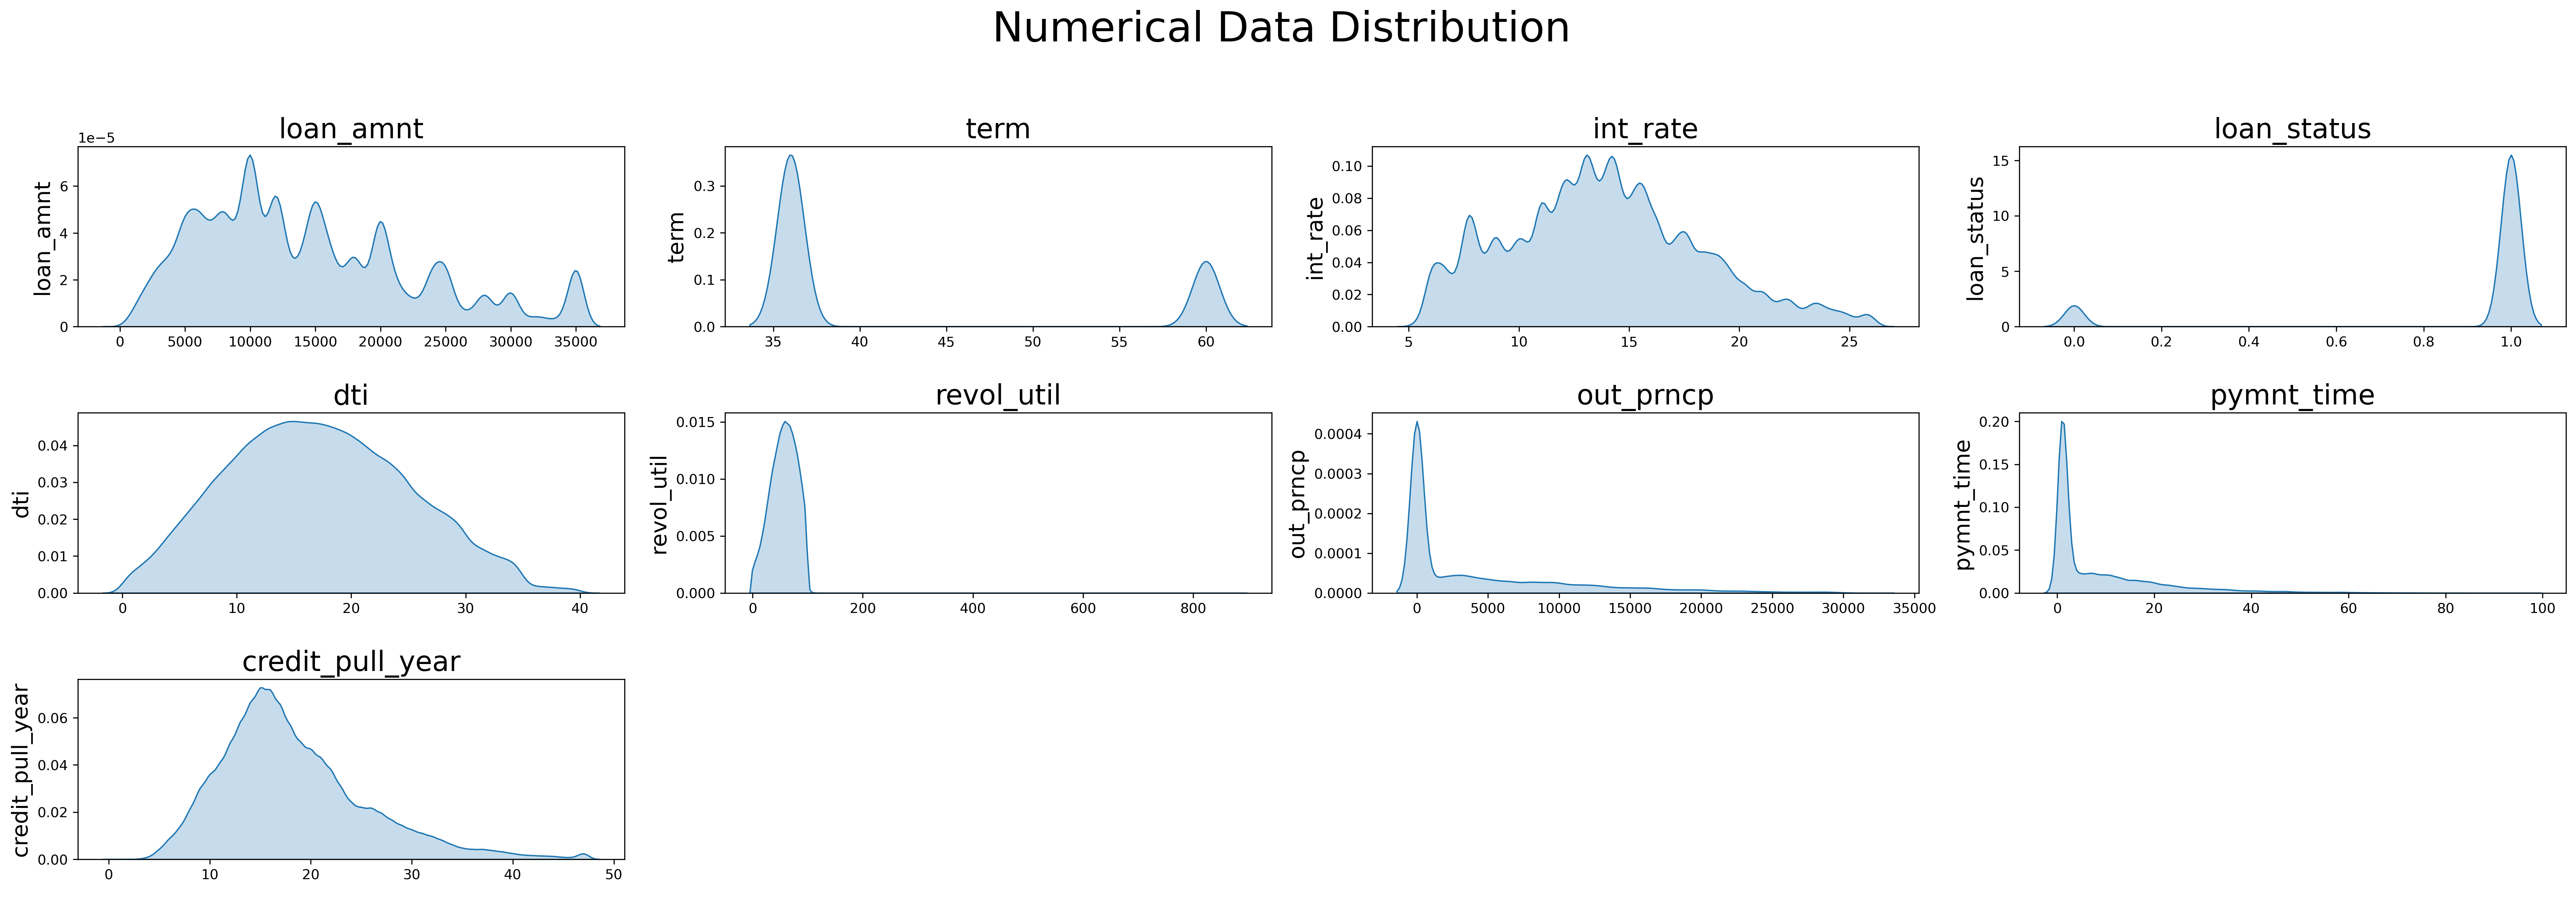

In [135]:
num = df_fe.select_dtypes(include='number').columns
plt.figure(figsize=(26,28), dpi=300)
for i in range(0,len(num)):
    plt.subplot(10,4,i+1)
    plt.suptitle("Numerical Data Distribution \n \n", size=30)
    sns.kdeplot(x=df_fe[num[i]], palette='pastel', shade=True)
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.ylabel(str(num[i]), size=16)
    plt.tight_layout()

Because the data other than loan_status and term columns have not normal distribution, we want to scaling them using __standard scaler__.

source : https://anzihory.medium.com/normalisasi-vs-standarisasi-101093633e18#:~:text=Pertama%2C%20biasanya%20penggunaan%20normalisasi%20dilakukan,tidak%20terdistribusi%20normal%20secara%20gaussian.

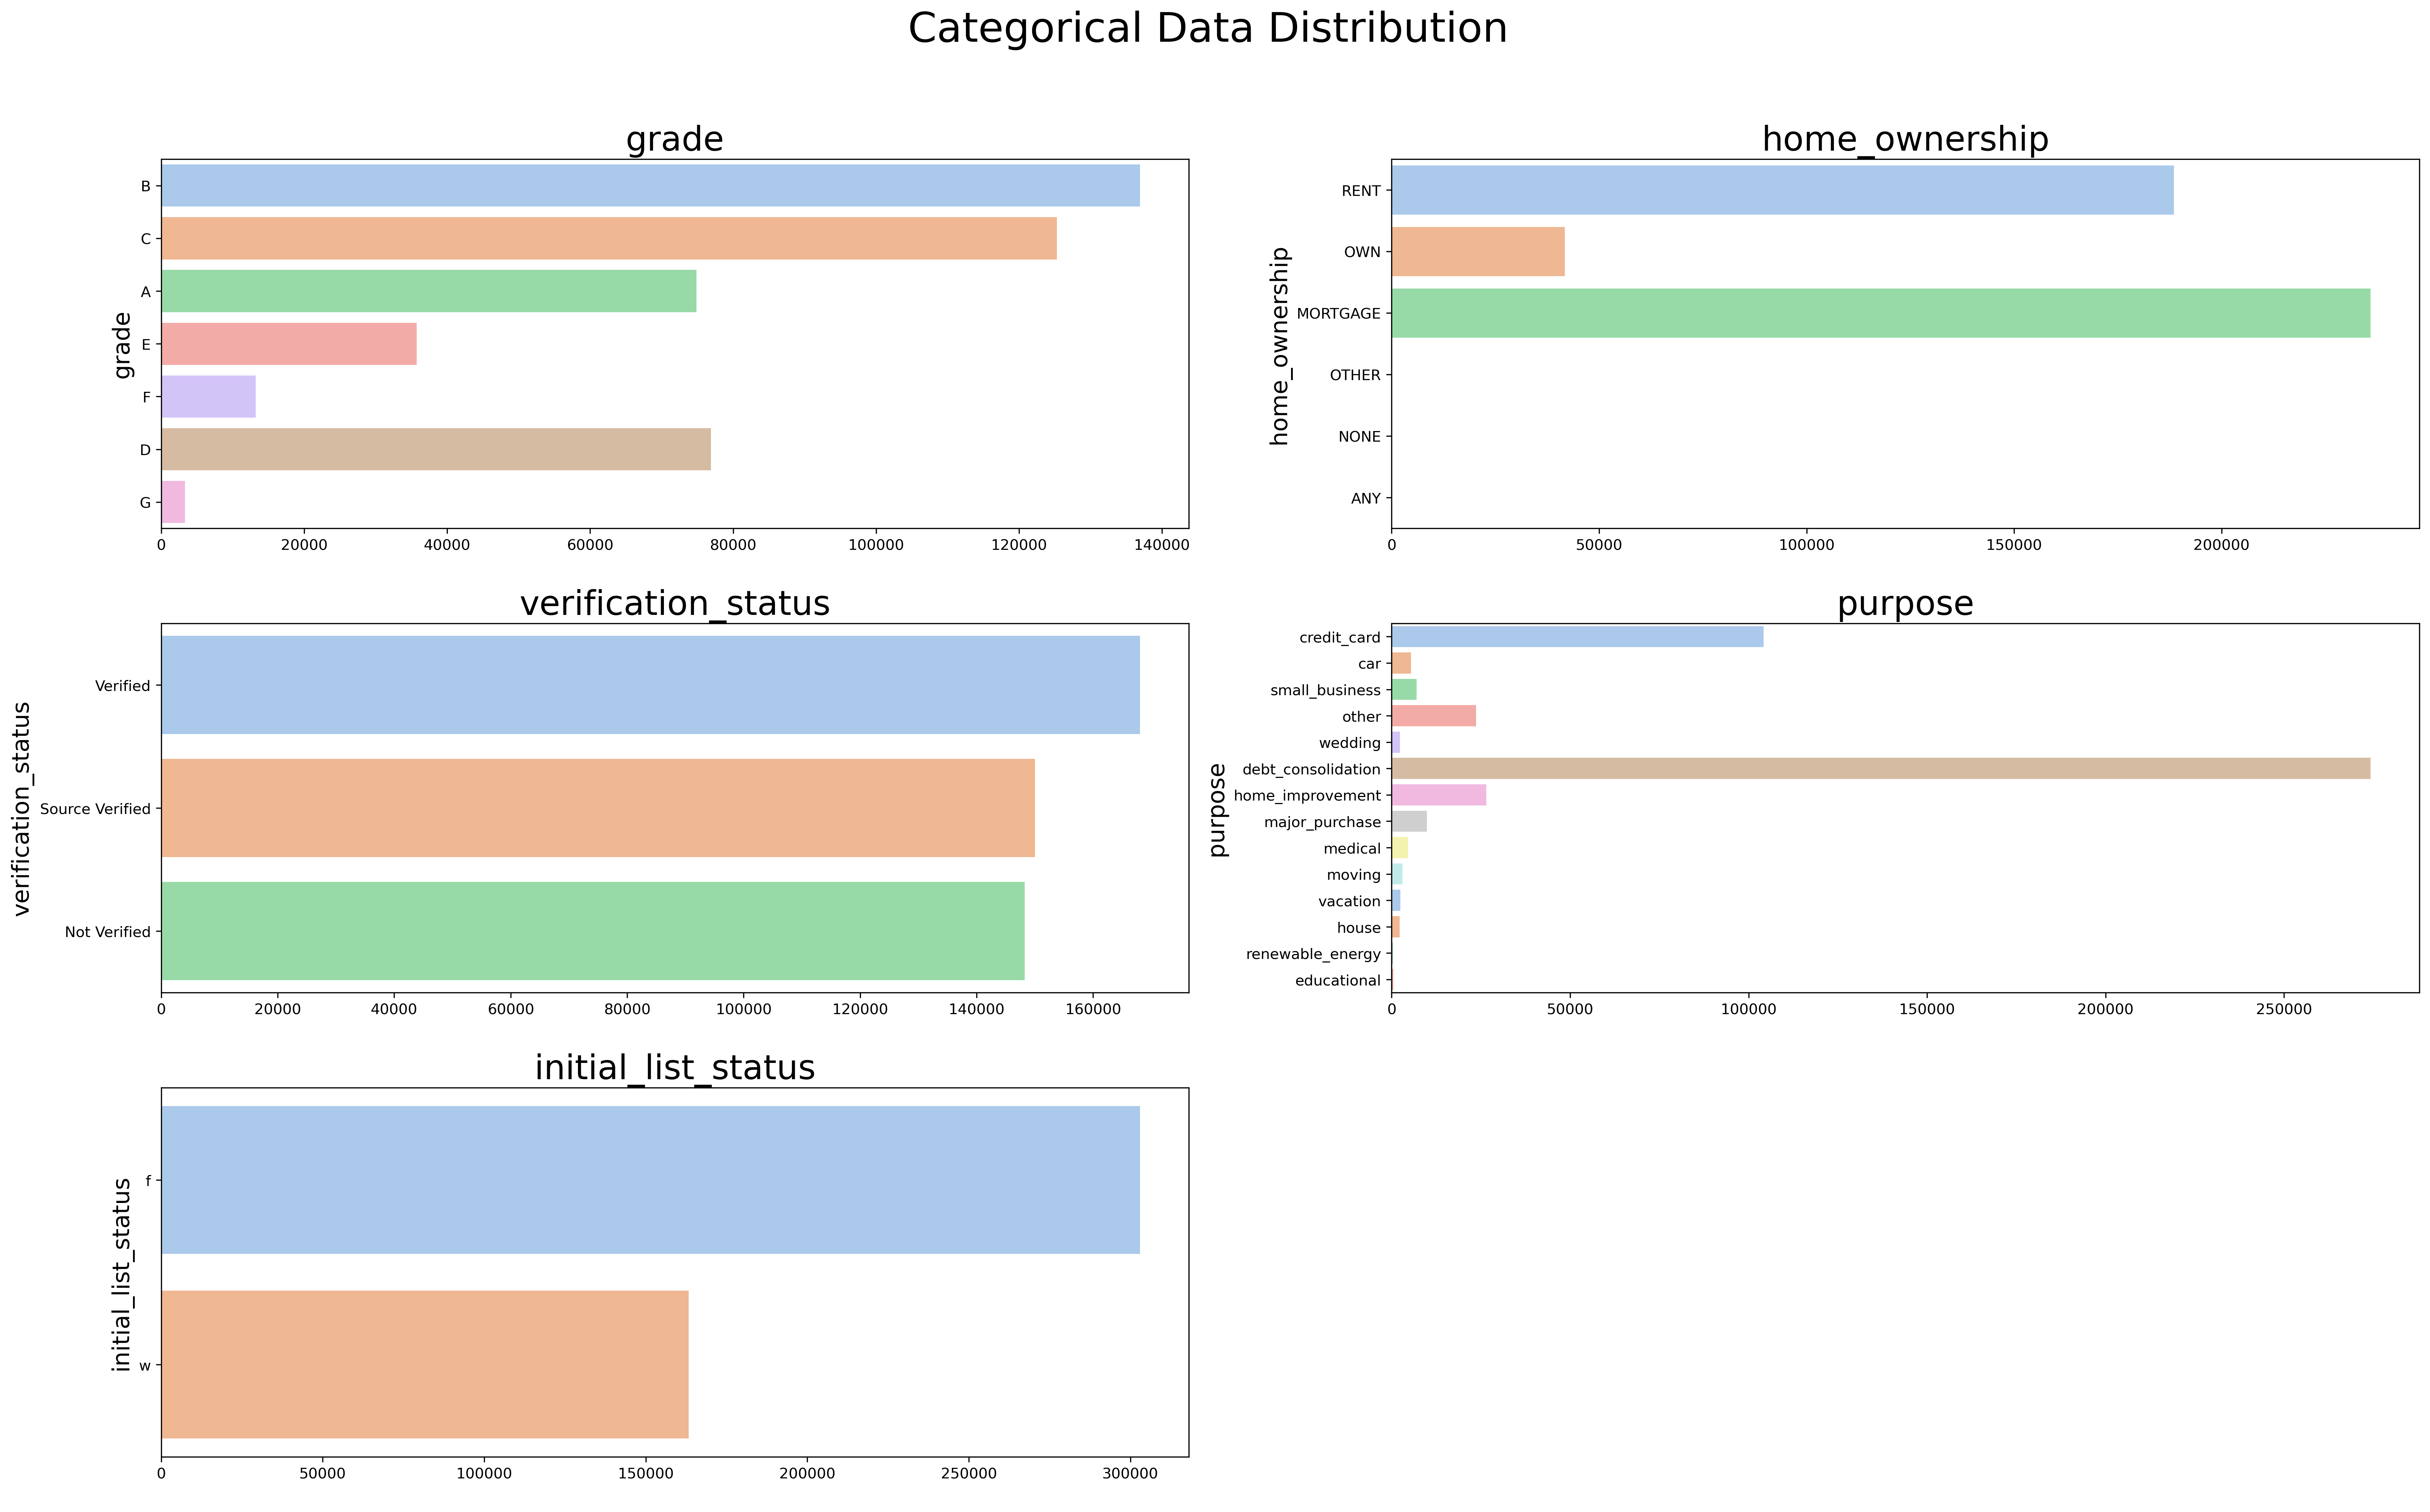

In [136]:
cat = df_fe.select_dtypes(include='object').columns
plt.figure(figsize=(23,23), dpi=300)
for i in range(0,len(cat)):
    plt.subplot(5,2,i+1)
    plt.suptitle("Categorical Data Distribution \n \n", size=28)
    sns.countplot(y=df_fe[cat[i]], orient = 'h',palette='pastel')
    plt.title(cat[i], size=23)
    plt.xlabel(' ')
    plt.ylabel(str(cat[i]), size=16)
    plt.tight_layout()

On categorical columns we want to encoding them using one hot encoding

## Feature Scaling for Numeric Data

In [137]:
df_prep = df_fe.copy()

In [138]:
num = []

for i in df_prep.select_dtypes(include="number").columns:
    if i == "loan_status":
        continue
    elif i == "term":
        continue
    else:
        num.append(i)

num

['loan_amnt',
 'int_rate',
 'dti',
 'revol_util',
 'out_prncp',
 'pymnt_time',
 'credit_pull_year']

In [139]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(df_prep[num])
x

array([[-1.12439236, -0.72958719,  1.3286323 , ..., -0.69394373,
         0.33369114,  1.74905494],
       [-1.42608788,  0.33063384, -2.06579097, ..., -0.69394373,
         2.04744624, -0.58625891],
       [-1.4381557 ,  0.48897854, -1.08249087, ..., -0.69394373,
         0.90494284, -0.4488875 ],
       ...,
       [ 0.7702555 ,  0.72534817,  1.07389134, ...,  1.57641766,
        -0.64559749, -0.58625891],
       [-1.48642698, -1.36067114, -1.50663457, ..., -0.69394373,
         0.41529852, -0.86100171],
       [-0.52100132,  1.23251018,  0.70833807, ..., -0.06698309,
        -0.64559749, -0.3115161 ]])

Join array (x) to dataframe (df_encode)

In [140]:
df_x = {"loan_amnt" : x[:, 0], "int_rate" : x[:, 1], "dti" : x[:, 2], 
        "revol_util" : x[:, 3], "out_prncp" : x[:, 4], "pymnt_time" : x[:, 5], 
        "credit_pull_year" : x[:, 6]}
df_x = pd.DataFrame(data=df_x)
df_x.head(3)

loan_amnt  int_rate       dti  revol_util  out_prncp  pymnt_time  \
0  -1.124392 -0.729587  1.328632    1.160093  -0.693944    0.333691   
1  -1.426088  0.330634 -2.065791   -1.971760  -0.693944    2.047446   
2  -1.438156  0.488979 -1.082491    1.783934  -0.693944    0.904943   

   credit_pull_year  
0          1.749055  
1         -0.586259  
2         -0.448888

In [141]:
df_prep["loan_amnt"] = df_x["loan_amnt"]
df_prep["int_rate"] = df_x["int_rate"]
df_prep["dti"] = df_x["dti"]
df_prep["revol_util"] = df_x["revol_util"]
df_prep["out_prncp"] = df_x["out_prncp"]
df_prep["pymnt_time"] = df_x["pymnt_time"]
df_prep["credit_pull_year"] = df_x["credit_pull_year"]
df_prep.head(3)

loan_amnt  term  int_rate grade home_ownership verification_status  \
0  -1.124392    36 -0.729587     B           RENT            Verified   
1  -1.426088    60  0.330634     C           RENT     Source Verified   
2  -1.438156    36  0.488979     C           RENT        Not Verified   

   loan_status         purpose       dti  revol_util initial_list_status  \
0            1     credit_card  1.328632    1.160093                   f   
1            0             car -2.065791   -1.971760                   f   
2            1  small_business -1.082491    1.783934                   f   

   out_prncp  pymnt_time  credit_pull_year  
0  -0.693944    0.333691          1.749055  
1  -0.693944    2.047446         -0.586259  
2  -0.693944    0.904943         -0.448888

## Feature Encoding (One Hot) for Categorical Data

In [142]:
print(df_prep['term'].unique())
print(df_prep['grade'].unique())
print(df_prep['home_ownership'].unique())
print(df_prep['verification_status'].unique())
print(df_prep['purpose'].unique())
print(df_prep['initial_list_status'].unique())

[36 60]
['B' 'C' 'A' 'E' 'F' 'D' 'G']
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
['Verified' 'Source Verified' 'Not Verified']
['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
['f' 'w']


In [143]:
df_prep['home_ownership'].value_counts()

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64

__home_ownership__ with values ANY and NONE will be combined with value OTHER

In [144]:
# Replace label with same characteristic 
target_dict = {'MORTGAGE':'MORTGAGE',
               'RENT':'RENT',
               'OWN':'OWN',
               'OTHER':'OTHER',
               'ANY':'OTHER',
               'NONE':'OTHER'}

df_prep["home_ownership"] = df_prep["home_ownership"].map(target_dict)
df_prep.head(3)

loan_amnt  term  int_rate grade home_ownership verification_status  \
0  -1.124392    36 -0.729587     B           RENT            Verified   
1  -1.426088    60  0.330634     C           RENT     Source Verified   
2  -1.438156    36  0.488979     C           RENT        Not Verified   

   loan_status         purpose       dti  revol_util initial_list_status  \
0            1     credit_card  1.328632    1.160093                   f   
1            0             car -2.065791   -1.971760                   f   
2            1  small_business -1.082491    1.783934                   f   

   out_prncp  pymnt_time  credit_pull_year  
0  -0.693944    0.333691          1.749055  
1  -0.693944    2.047446         -0.586259  
2  -0.693944    0.904943         -0.448888

In [145]:
df_prep['home_ownership'].value_counts()

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          233
Name: home_ownership, dtype: int64

In [146]:
cat = df_prep.select_dtypes(include="object").columns.tolist()
cat.append("term")
cat

['grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status',
 'term']

In [147]:
df_onehots = pd.get_dummies(df_prep, columns = cat)
df_onehots.head(3)

loan_amnt  int_rate  loan_status       dti  revol_util  out_prncp  \
0  -1.124392 -0.729587            1  1.328632    1.160093  -0.693944   
1  -1.426088  0.330634            0 -2.065791   -1.971760  -0.693944   
2  -1.438156  0.488979            1 -1.082491    1.783934  -0.693944   

   pymnt_time  credit_pull_year  grade_A  grade_B  grade_C  grade_D  grade_E  \
0    0.333691          1.749055        0        1        0        0        0   
1    2.047446         -0.586259        0        0        1        0        0   
2    0.904943         -0.448888        0        0        1        0        0   

   grade_F  grade_G  home_ownership_MORTGAGE  home_ownership_OTHER  \
0        0        0                        0                     0   
1        0        0                        0                     0   
2        0        0                        0                     0   

   home_ownership_OWN  home_ownership_RENT  verification_status_Not Verified  \
0                   0                    1                                 0   
1                   0                    1                                 0   
2                   0                    1                                 1   

   verification_status_Source Verified  verification_status_Verified  \
0                                    0                             1   
1                                    1                             0   
2                                    0                             0   

   purpose_car  purpose_credit_card  purpose_debt_consolidation  \
0            0                    1                           0   
1            1                    0                           0   
2            0                    0                           0   

   purpose_educational  purpose_home_improvement  purpose_house  \
0                    0                         0              0   
1                    0                         0              0   
2                    0                         0              0   

   purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  \
0                       0                0               0              0   
1                       0                0               0              0   
2                       0                0               0              0   

   purpose_renewable_energy  purpose_small_business  purpose_vacation  \
0                         0                       0                 0   
1                         0                       0                 0   
2                         0                       1                 0   

   purpose_wedding  initial_list_status_f  initial_list_status_w  term_36  \
0                0                      1                      0        1   
1                0                      1                      0        0   
2                0                      1                      0        1   

   term_60  
0        0  
1        1  
2        0

In [148]:
df_onehots.shape

(466285, 40)

## Train Test Split

In [149]:
X = df_onehots.drop("loan_status", axis=1)
y = df_onehots["loan_status"]

In [150]:
X.head()

loan_amnt  int_rate       dti  revol_util  out_prncp  pymnt_time  \
0  -1.124392 -0.729587  1.328632    1.160093  -0.693944    0.333691   
1  -1.426088  0.330634 -2.065791   -1.971760  -0.693944    2.047446   
2  -1.438156  0.488979 -1.082491    1.783934  -0.693944    0.904943   
3  -0.521001 -0.077850  0.354248   -1.482803  -0.693944    0.333691   
4  -1.365749 -0.261438  0.091865   -0.096020  -0.573268   -0.645597   

   credit_pull_year  grade_A  grade_B  grade_C  grade_D  grade_E  grade_F  \
0          1.749055        0        1        0        0        0        0   
1         -0.586259        0        0        1        0        0        0   
2         -0.448888        0        0        1        0        0        0   
3          0.100598        0        0        1        0        0        0   
4          0.237970        0        1        0        0        0        0   

   grade_G  home_ownership_MORTGAGE  home_ownership_OTHER  home_ownership_OWN  \
0        0                        0                     0                   0   
1        0                        0                     0                   0   
2        0                        0                     0                   0   
3        0                        0                     0                   0   
4        0                        0                     0                   0   

   home_ownership_RENT  verification_status_Not Verified  \
0                    1                                 0   
1                    1                                 0   
2                    1                                 1   
3                    1                                 0   
4                    1                                 0   

   verification_status_Source Verified  verification_status_Verified  \
0                                    0                             1   
1                                    1                             0   
2                                    0                             0   
3                                    1                             0   
4                                    1                             0   

   purpose_car  purpose_credit_card  purpose_debt_consolidation  \
0            0                    1                           0   
1            1                    0                           0   
2            0                    0                           0   
3            0                    0                           0   
4            0                    0                           0   

   purpose_educational  purpose_home_improvement  purpose_house  \
0                    0                         0              0   
1                    0                         0              0   
2                    0                         0              0   
3                    0                         0              0   
4                    0                         0              0   

   purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  \
0                       0                0               0              0   
1                       0                0               0              0   
2                       0                0               0              0   
3                       0                0               0              1   
4                       0                0               0              1   

   purpose_renewable_energy  purpose_small_business  purpose_vacation  \
0                         0                       0                 0   
1                         0                       0                 0   
2                         0                       1                 0   
3                         0                       0                 0   
4                         0                       0                 0   

   purpose_wedding  initial_list_status_f  initial_list_status_w  term_36  \
0                0                      1      

In [151]:
y

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: loan_status, Length: 466285, dtype: int32

In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [153]:
y_train.value_counts()

1    290813
0     35586
Name: loan_status, dtype: int64

We can see that the data is having imbalance data. So, we will using __SMOTE__ to handling it.

## Handling Imbalanced Data

__SMOTE__

Synthetic Minority Oversampling Technique or SMOTE is another technique to oversample the minority class. Simply adding duplicate records of minority class often don’t add any new information to the model. In SMOTE new instances are synthesized from the existing data. If we explain it in simple words, SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space.

source : https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/

In [154]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(X_train, y_train)

In [155]:
oversampled_Y.value_counts()

0    290813
1    290813
Name: loan_status, dtype: int64

# Modeling

In [156]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [157]:
# Logistic regression
classifier = LogisticRegression()
classifier.fit(oversampled_X, oversampled_Y)
y_pred = classifier.predict(X_test)
y_pred_prob = classifier.predict_proba(X_test)[:][:,1]

In [158]:
#Decision tree
classifier2 = DecisionTreeClassifier()
classifier2.fit(oversampled_X, oversampled_Y)
y_pred2 = classifier2.predict(X_test)
y_pred2_prob = classifier2.predict_proba(X_test)[:][:,1]

In [159]:
#Random Forest
classifier3 = RandomForestClassifier()
classifier3.fit(oversampled_X, oversampled_Y)
y_pred3 = classifier3.predict(X_test)
y_pred3_prob = classifier3.predict_proba(X_test)[:][:,1]

In [160]:
#Adaboost
classifier4 = AdaBoostClassifier()
classifier4.fit(oversampled_X, oversampled_Y)
y_pred4 = classifier4.predict(X_test)
y_pred4_prob = classifier4.predict_proba(X_test)[:][:,1]

In [161]:
#Gradient Boost
classifier5 = GradientBoostingClassifier()
classifier5.fit(oversampled_X, oversampled_Y)
y_pred5 = classifier4.predict(X_test)
y_pred5_prob = classifier5.predict_proba(X_test)[:][:,1]

# Model Evaluation

In [162]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, fbeta_score,roc_auc_score, roc_curve, auc, confusion_matrix

In [163]:
#evaluation of results
def model_evaluation(y_test, y_pred, y_pred_prob, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta = 2.0)
    
    df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), 
                                     pd.DataFrame(y_pred_prob, columns=['y_pred_proba'])], axis=1)
    
    fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
    auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
    
    df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
    df_actual_predicted = df_actual_predicted.reset_index()

    df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
    df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
    df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
    df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
    df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
    df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())
    KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2, auc, KS]], 
                       columns = ["Model", "Accuracy", "Precision", "Recall",
                                 "F1 Score", "F2 Score", "AUC", "KS"])
    results = results.sort_values(["AUC", "KS"], ascending = False)
    return results

In [164]:
lr = model_evaluation(y_test, y_pred, y_pred_prob, "Logistic Regression")
dt = model_evaluation(y_test, y_pred2, y_pred3_prob, "Decision Tree")
rf = model_evaluation(y_test, y_pred3, y_pred3_prob, "Random Forest")
ab = model_evaluation(y_test, y_pred4, y_pred4_prob, "Adaboost")
gb = model_evaluation(y_test, y_pred5, y_pred5_prob, "Gradient Boost")

In [165]:
eval_ =lr.append(dt).append(rf).append(ab).append(gb).sort_values(["AUC", "KS"], ascending = False).reset_index().drop(columns = "index")
eval_

Model  Accuracy  Precision    Recall  F1 Score  F2 Score  \
0       Gradient Boost  0.748138   0.974064  0.736635  0.838873  0.774386   
1        Decision Tree  0.852065   0.925856  0.906372  0.916011  0.910203   
2        Random Forest  0.869451   0.937016  0.914814  0.925782  0.919170   
3             Adaboost  0.748138   0.974064  0.736635  0.838873  0.774386   
4  Logistic Regression  0.769791   0.944212  0.787902  0.859004  0.814882   

        AUC        KS  
0  0.874654  0.601585  
1  0.872870  0.603030  
2  0.872870  0.603030  
3  0.861505  0.582210  
4  0.770909  0.423403

We can see that the models with higher AUC and KS is Gradien Boosting. So we decided to using Gradient Boosting model and try to implement hyperparameter tunning.

<AxesSubplot:>

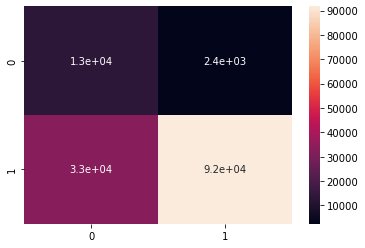

In [166]:
sns.heatmap(confusion_matrix(y_test, y_pred5), annot=True)

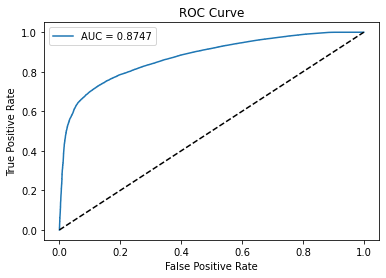

In [167]:
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred5_prob, columns=['y_pred_proba'])], axis=1)

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

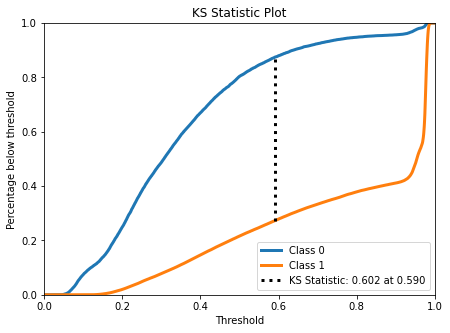

In [168]:
import scikitplot as skplt
y_pred_proba = classifier5.predict_proba(X_test)

skplt.metrics.plot_ks_statistic(y_test, y_pred_proba, figsize=(7,5));

For threshold we will using 0.59

# Hyperparameter Tunning

In [169]:
from pprint import pprint
print('Parameters currently use :\n')
pprint(classifier5.get_params())

Parameters currently use :

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


To perform hyperparameter tuning we will use RandomizedSearchCV from Scikit Learn, and to use RandomizedSearchCV we first need to create initial parameters to be sampled during the fitting process

In [170]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'max_depth': [int(x) for x in np.linspace(start = 3, stop = 10, num = 3)]}
pprint(random_grid)

{'max_depth': [3, 6, 10]}


In [171]:
gb_random = RandomizedSearchCV(estimator = classifier5, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, 
                               n_jobs = -1)

# Fit the random search model
gb_random.fit(oversampled_X, oversampled_Y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1, param_distributions={'max_depth': [3, 6, 10]},
                   random_state=42, verbose=2)

In [193]:
gb_random.best_params_

{'max_depth': 10}

In [202]:
gb_tunning = GradientBoostingClassifier(max_depth=10)
gb_tunning.fit(oversampled_X, oversampled_Y)

GradientBoostingClassifier(max_depth=10)

In [203]:
y_pred = gb_tunning.predict(X_test)
y_pred_prob = gb_tunning.predict_proba(X_test)[:][:,1]

In [204]:
gb_tunning_eval = model_evaluation(y_test, y_pred, y_pred_prob, "Gradient Boosting - Hyperparameter Tunning")
eval_ =lr.append(dt).append(rf).append(ab).append(gb).append(gb_tunning_eval).sort_values(["AUC", "KS"], ascending = False).reset_index().drop(columns = "index")
eval_

Model  Accuracy  Precision    Recall  \
0  Gradient Boosting - Hyperparameter Tunning  0.892770   0.924684  0.957511   
1                              Gradient Boost  0.748138   0.974064  0.736635   
2                               Decision Tree  0.852065   0.925856  0.906372   
3                               Random Forest  0.869451   0.937016  0.914814   
4                                    Adaboost  0.748138   0.974064  0.736635   
5                         Logistic Regression  0.769791   0.944212  0.787902   

   F1 Score  F2 Score       AUC        KS  
0  0.940812  0.950761  0.878641  0.607584  
1  0.838873  0.774386  0.874654  0.601585  
2  0.916011  0.910203  0.872870  0.603030  
3  0.925782  0.919170  0.872870  0.603030  
4  0.838873  0.774386  0.861505  0.582210  
5  0.859004  0.814882  0.770909  0.423403

We can see that, with hyperparameter tuning, __AUC and KS__ values __increase__, also another metrics

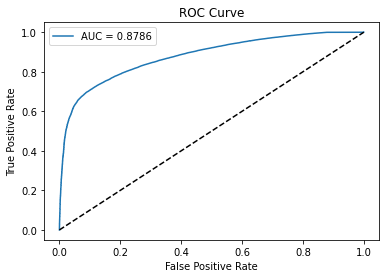

In [205]:
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_prob, columns=['y_pred_proba'])], axis=1)

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

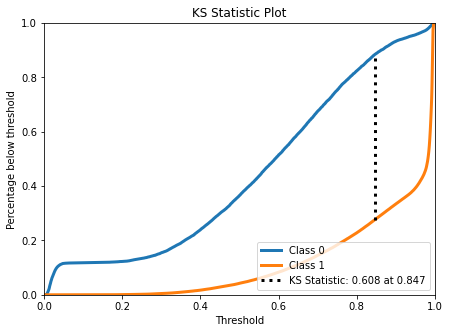

In [206]:
import scikitplot as skplt
y_pred_proba = gb_random.predict_proba(X_test)

skplt.metrics.plot_ks_statistic(y_test, y_pred_proba, figsize=(7,5));

To be continued...